# Importing libraries 

In [496]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import os
import math
from datetime import datetime
from IPython.display import display
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

# Dataset 

In [ ]:
df = pd.read_csv("C:/Users/furkn/Desktop/veri/Housing.csv")

In [498]:
df.sample(10)

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
58   7210000  7680         4          2        4      yes       yes       no   
187  5110000  6100         3          1        1      yes        no      yes   
250  4515000  3510         3          1        3      yes        no       no   
72   6720000  5020         3          1        4      yes        no       no   
271  4340000  1905         5          1        2       no        no      yes   
528  2275000  3970         1          1        1       no        no       no   
455  3129000  5495         3          1        1      yes        no      yes   
453  3150000  3069         2          1        1      yes        no       no   
243  4550000  2550         3          1        2      yes        no      yes   
210  4900000  4646         3          1        2      yes       yes      yes   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
58               no             yes        1       no   semi-furnished  
187              no             yes        0      yes   semi-furnished  
250              no              no        0       no   semi-furnished  
72               no             yes        0      yes      unfurnished  
271              no              no        0       no   semi-furnished  
528              no              no        0       no      unfurnished  
455              no              no        0       no      unfurnished  
453              no              no        1       no      unfurnished  
243              no              no        0       no        furnished  
210              no              no        2       no   semi-furnished

In [499]:
df.nunique().sort_values()

guestroom             2
basement              2
mainroad              2
hotwaterheating       2
airconditioning       2
prefarea              2
furnishingstatus      3
bathrooms             4
parking               4
stories               4
bedrooms              6
price               219
area                284
dtype: int64

In [500]:
#df.drop(['dteday','instant'], axis=1, inplace=True)
display(df.head())

target = 'price'
features = [i for i in df.columns if i not in [target]]

original_df = df.copy(deep=True)

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished


Inference: The Datset consists of 13 features & 545 samples.


In [501]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [502]:
df.shape 

(545, 13)

In [503]:
df.describe() 

price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000

In [504]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [505]:
df.duplicated().sum() 

np.int64(0)

In [506]:
df.loc[df.duplicated()]

Empty DataFrame
Columns: [price, area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus]
Index: []

In [507]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [508]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [509]:
df.select_dtypes(include='number').corr()

price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000

In [510]:
data=df.copy()

# Data Visualization 

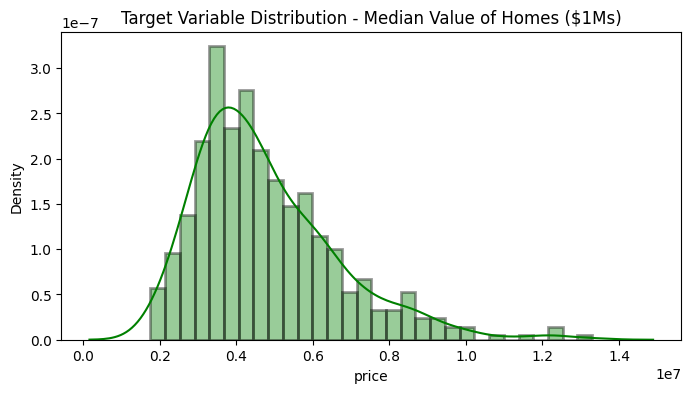

In [511]:
plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

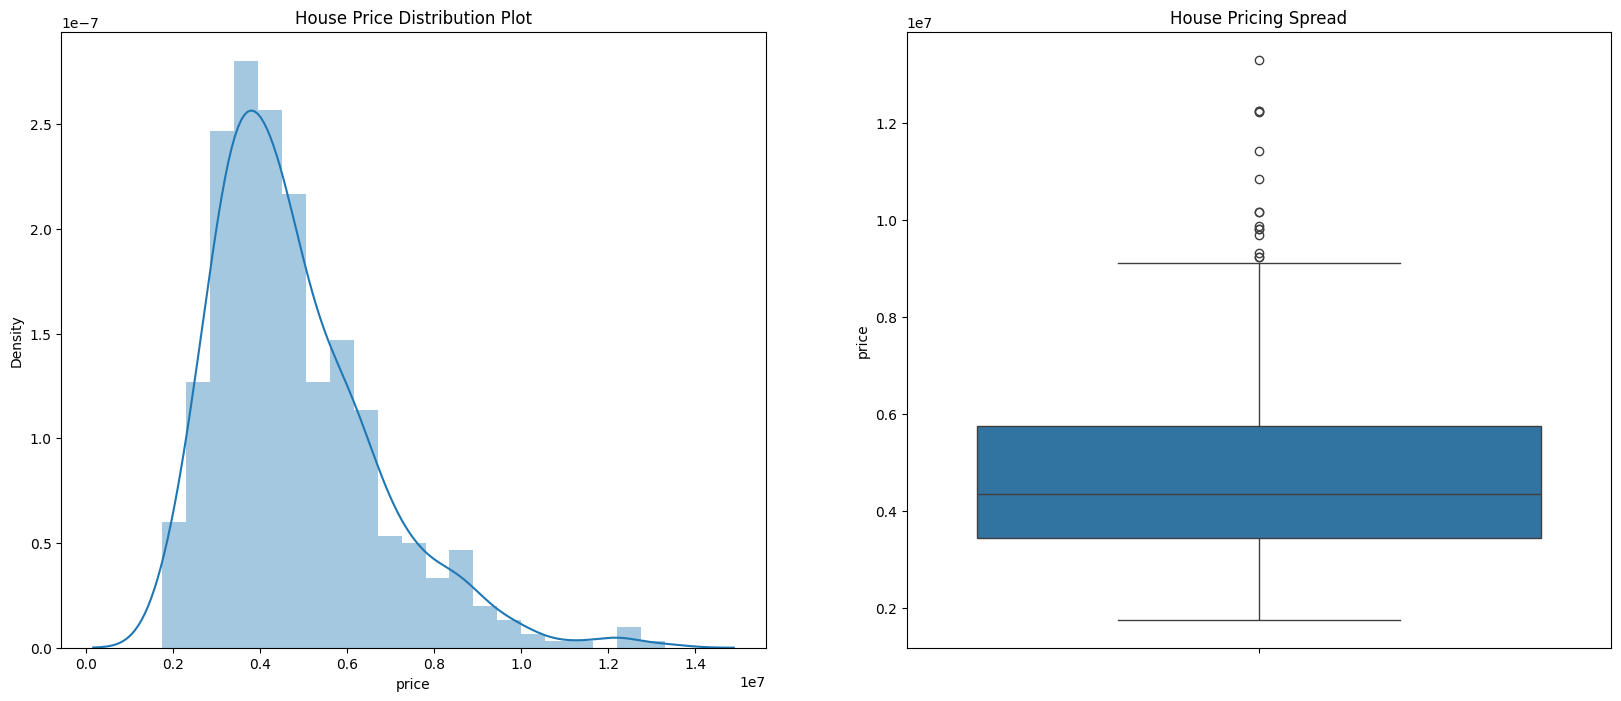

In [512]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('House Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
sns.boxplot(df.price)
plt.title('House Pricing Spread')

plt.show()

In [513]:
print(df.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
85%      6.615000e+06
90%      7.350000e+06
100%     1.330000e+07
max      1.330000e+07
Name: price, dtype: float64


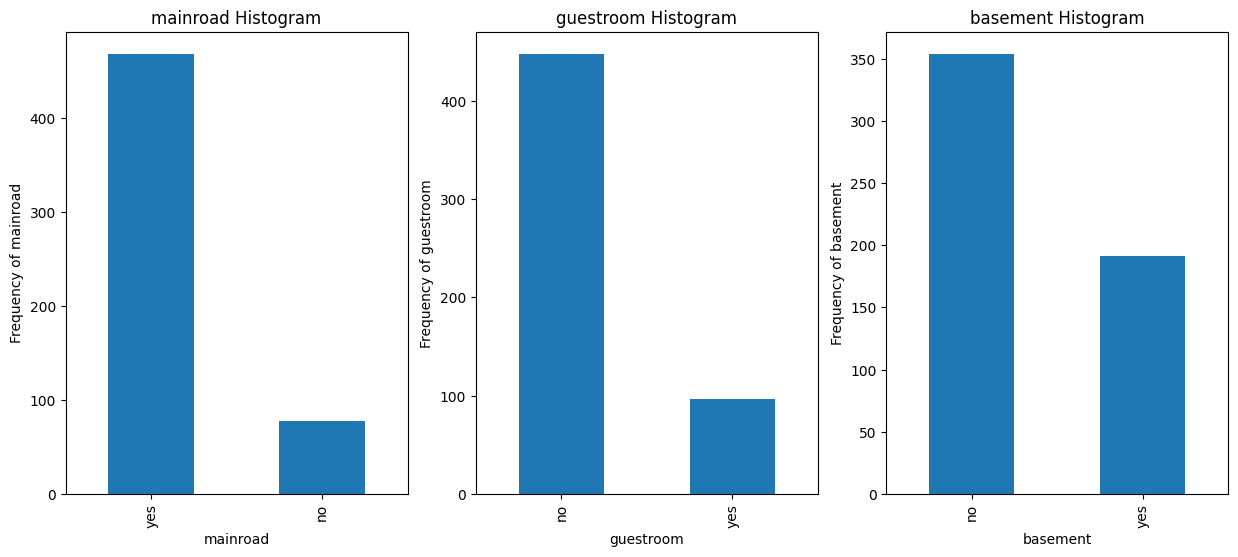

In [514]:
plt.figure(figsize=(15, 6))

plt.subplot(1,3,1)
plt1 = df['mainroad'].value_counts().plot(kind='bar')
plt.title('mainroad Histogram')
plt1.set(xlabel = 'mainroad', ylabel='Frequency of mainroad')

plt.subplot(1,3,2)
plt1 = df['guestroom'].value_counts().plot(kind='bar')
plt.title('guestroom Histogram')
plt1.set(xlabel = 'guestroom', ylabel='Frequency of guestroom')

plt.subplot(1,3,3)
plt1 = df['basement'].value_counts().plot(kind='bar')
plt.title('basement Histogram')
plt1.set(xlabel = 'basement', ylabel='Frequency of basement')

plt.show()

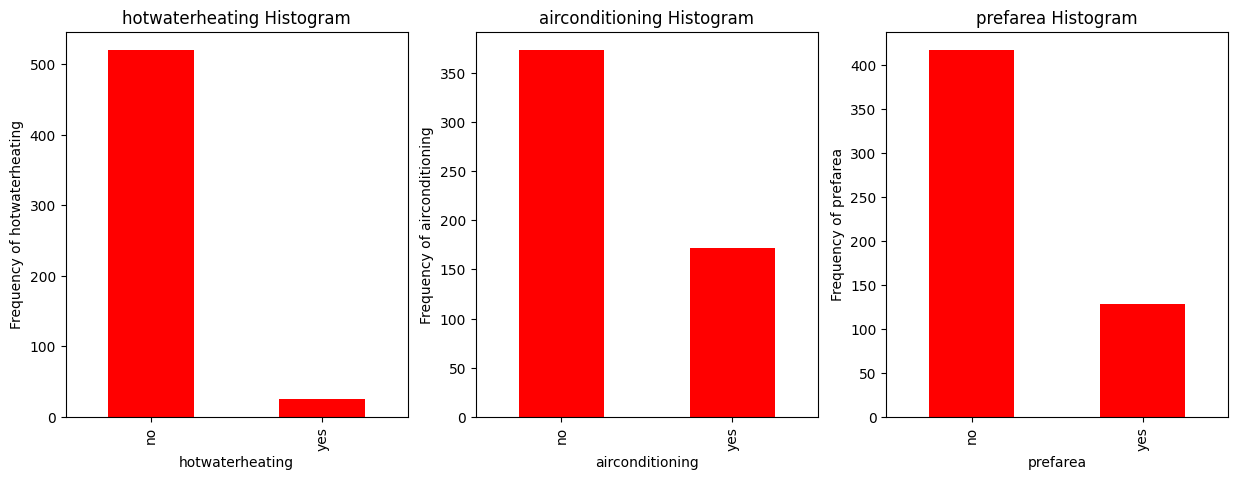

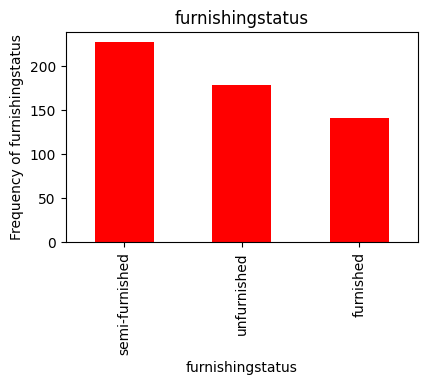

In [515]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt1 = df['hotwaterheating'].value_counts().plot(kind='bar',color='r')
plt.title('hotwaterheating Histogram')
plt1.set(xlabel = 'hotwaterheating', ylabel='Frequency of hotwaterheating')

plt.subplot(1, 3, 2)
plt1 = df['airconditioning'].value_counts().plot(kind='bar',color='r')
plt.title('airconditioning Histogram')
plt1.set(xlabel = 'airconditioning', ylabel='Frequency of airconditioning')

plt.subplot(1, 3, 3)
plt1 = df['prefarea'].value_counts().plot(kind='bar',color='r')
plt.title('prefarea Histogram')
plt1.set(xlabel = 'prefarea', ylabel='Frequency of prefarea')
plt.show()

plt.subplot(2, 2, 3)
plt1 = df['furnishingstatus'].value_counts().plot(kind='bar',color='r')
plt.title('furnishingstatus')
plt1.set(xlabel = 'furnishingstatus', ylabel='Frequency of furnishingstatus')
plt.show()

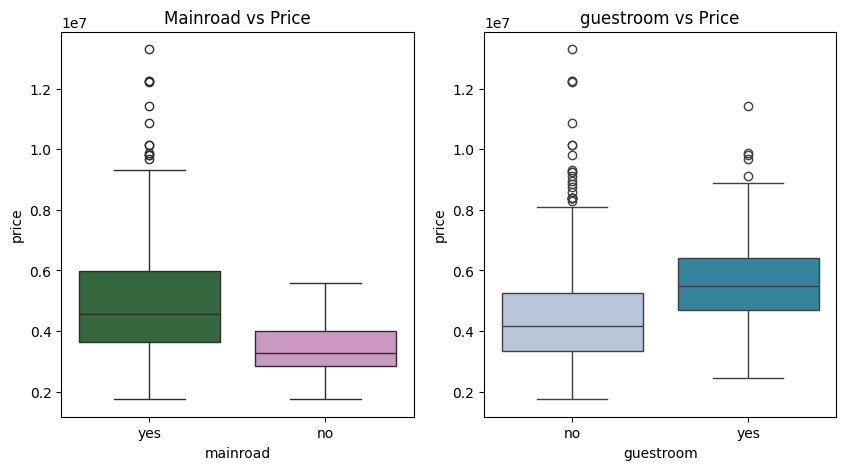

In [516]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Mainroad vs Price')
sns.boxplot(x=df.mainroad, y=df.price, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('guestroom vs Price')
sns.boxplot(x=df.guestroom, y=df.price, palette=("PuBuGn"))

plt.show()

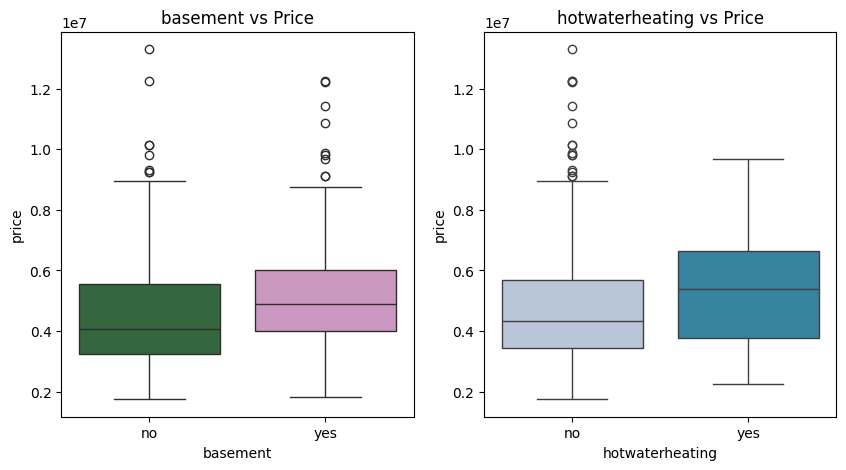

In [517]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('basement vs Price')
sns.boxplot(x=df.basement, y=df.price, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('hotwaterheating vs Price')
sns.boxplot(x=df.hotwaterheating, y=df.price, palette=("PuBuGn"))

plt.show()

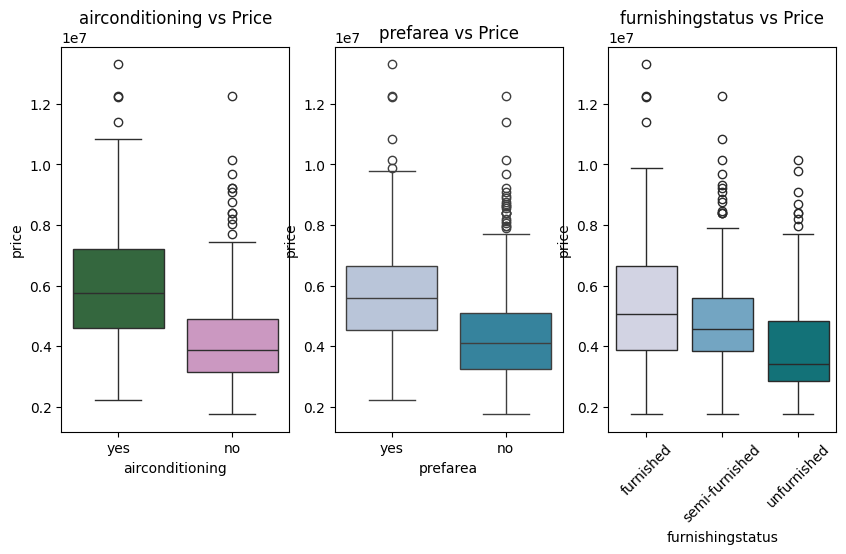

In [518]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.title('airconditioning vs Price')
sns.boxplot(x=df.airconditioning, y=df.price, palette=("cubehelix"))
plt.subplot(1,3,2)
plt.title('prefarea vs Price')
sns.boxplot(x=df.prefarea, y=df.price, palette=("PuBuGn"))

plt.subplot(1,3,3)
plt.title('furnishingstatus vs Price')
sns.boxplot(x=df.furnishingstatus, y=df.price, palette=("PuBuGn"))
plt.xticks(rotation=45)

plt.show()

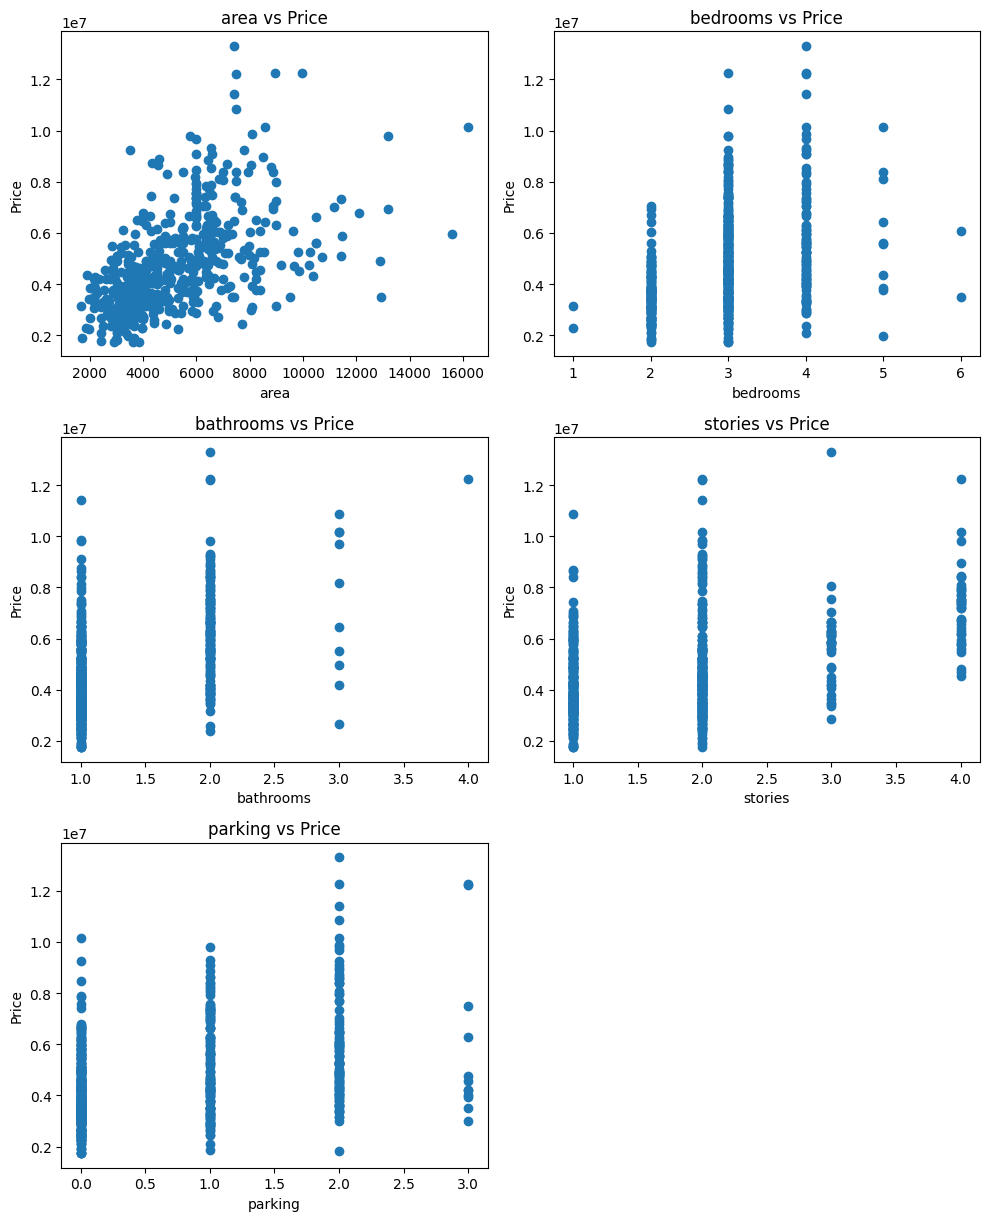

In [519]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('area', 1)
scatter('bedrooms', 2)
scatter('bathrooms', 3)
scatter('stories', 4)
scatter('parking',5)

plt.tight_layout()

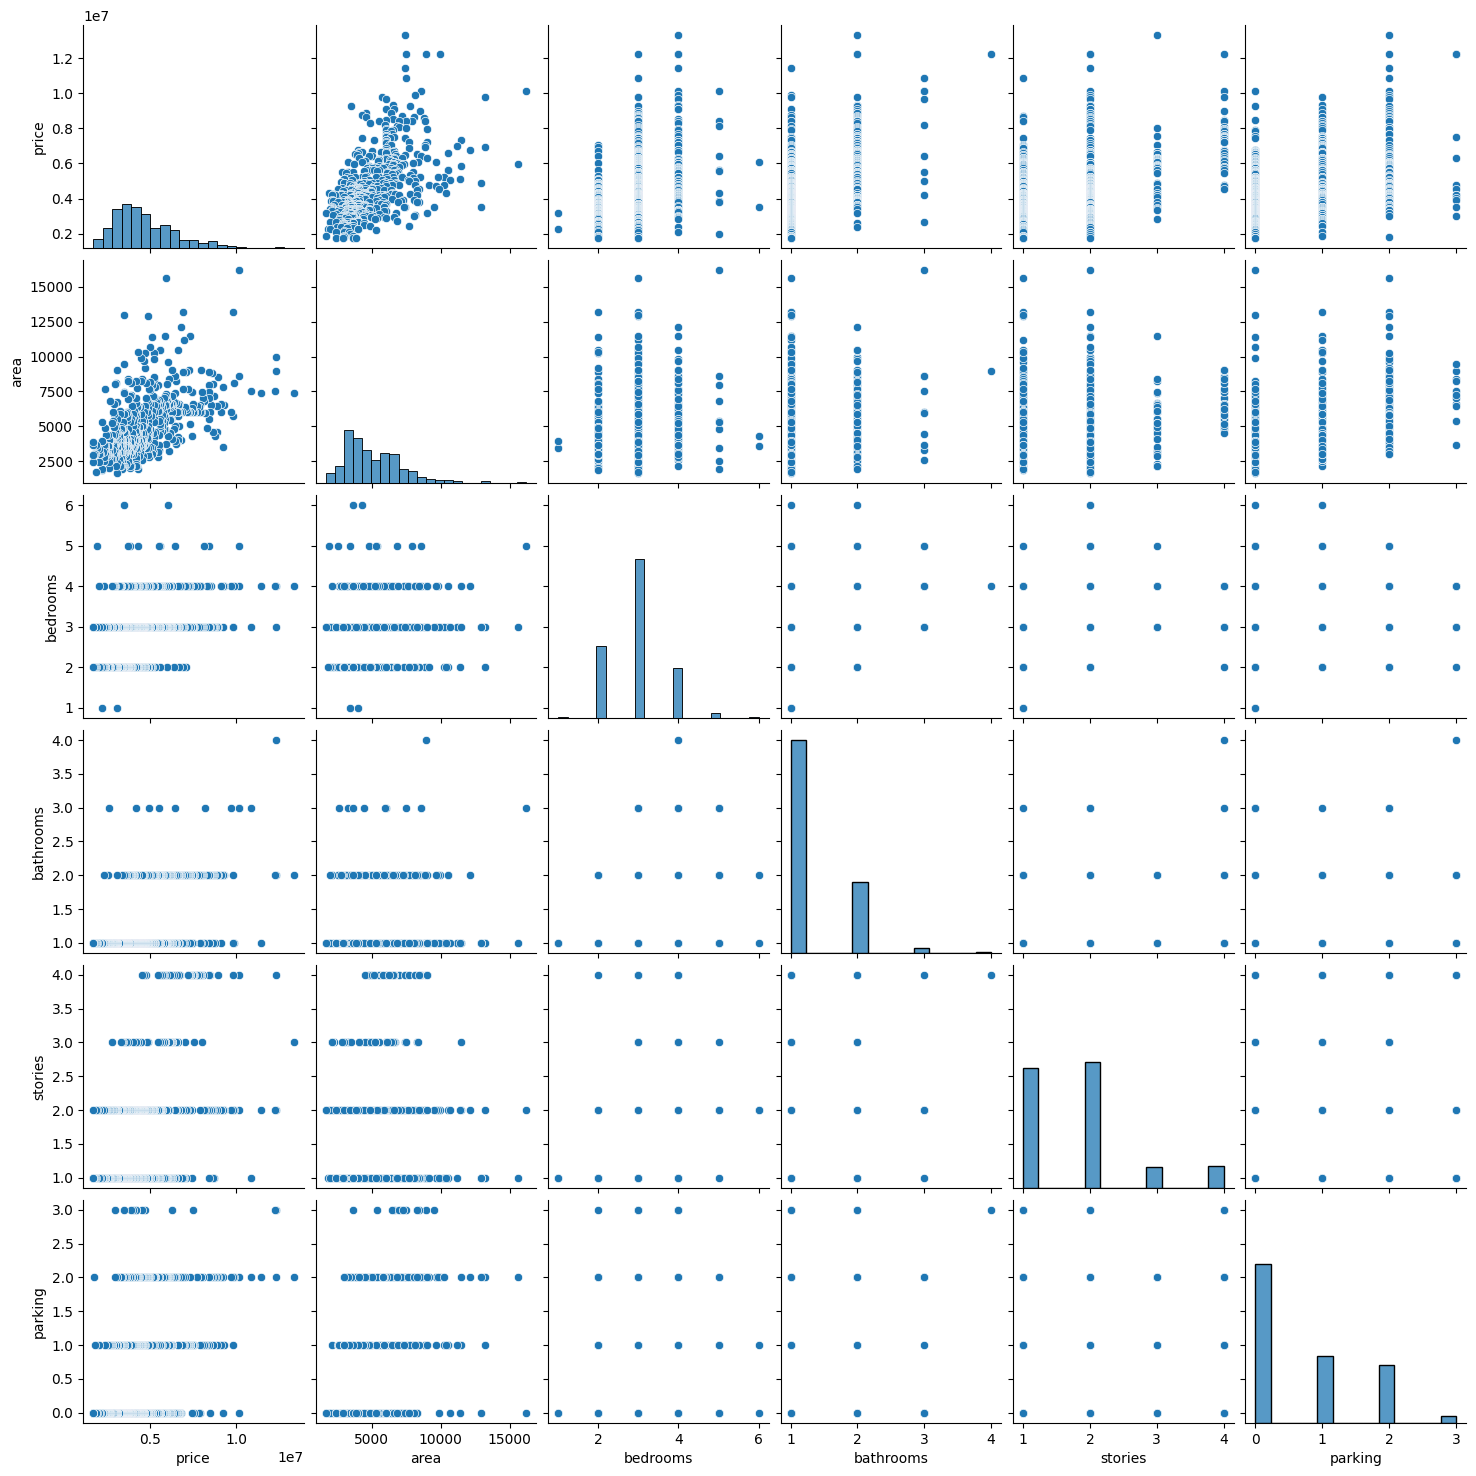

In [520]:
sns.pairplot(df)
plt.show()

In [521]:
nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; 

for i in range(df[features].shape[1]):
    if nu.values[i]<=16:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Dataset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Dataset has 1 numerical & 11 categorical features.


                               Visualising Categorical Features:                                


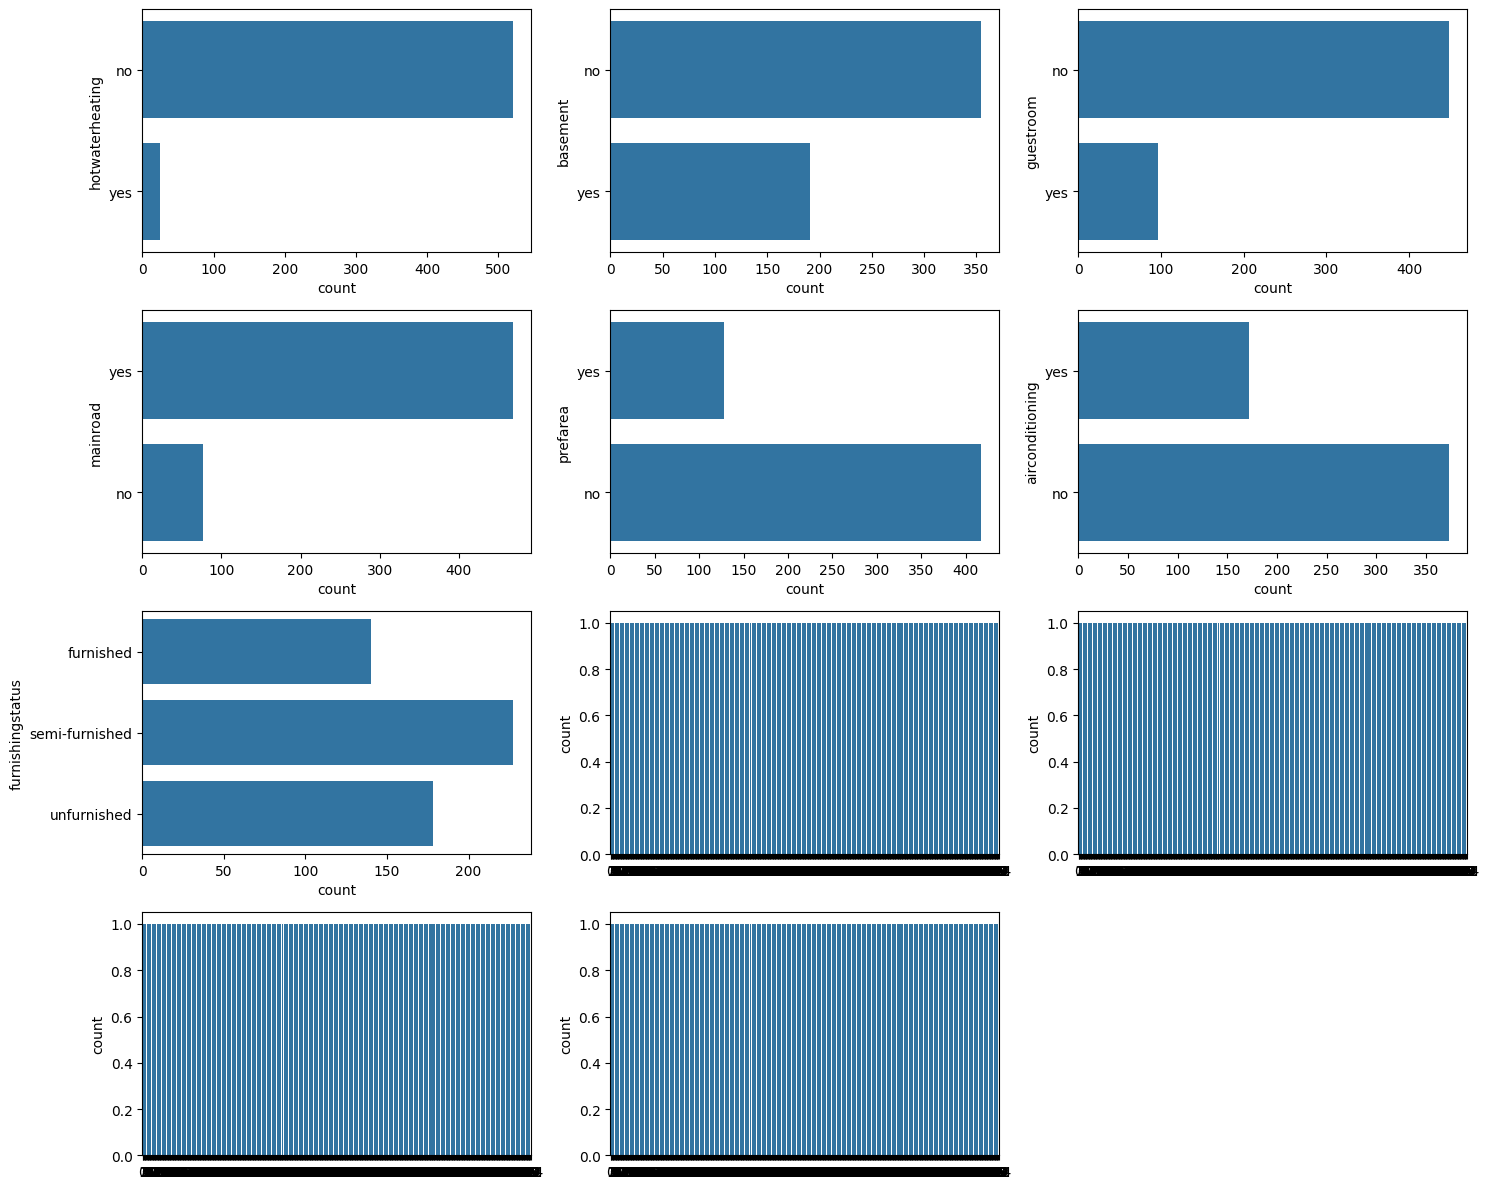

In [522]:
print('\033[1mVisualising Categorical Features:'.center(100))

n=3
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=8:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.subplot(3,1,3)
        sns.countplot(df[cf[i]])
        
plt.tight_layout()
plt.show()

                                                Numeric Features Distribution                                                 


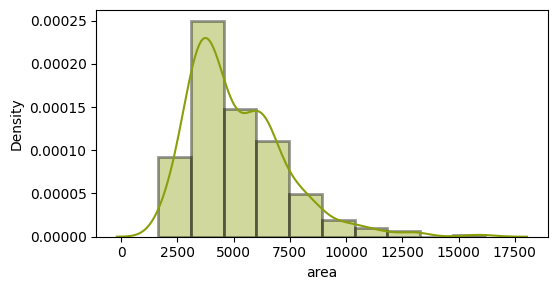

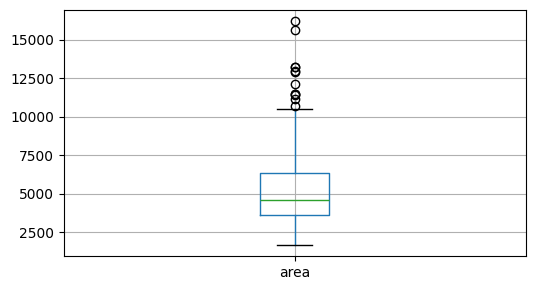

In [523]:
print('\033[1mNumeric Features Distribution'.center(130))

n=3

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

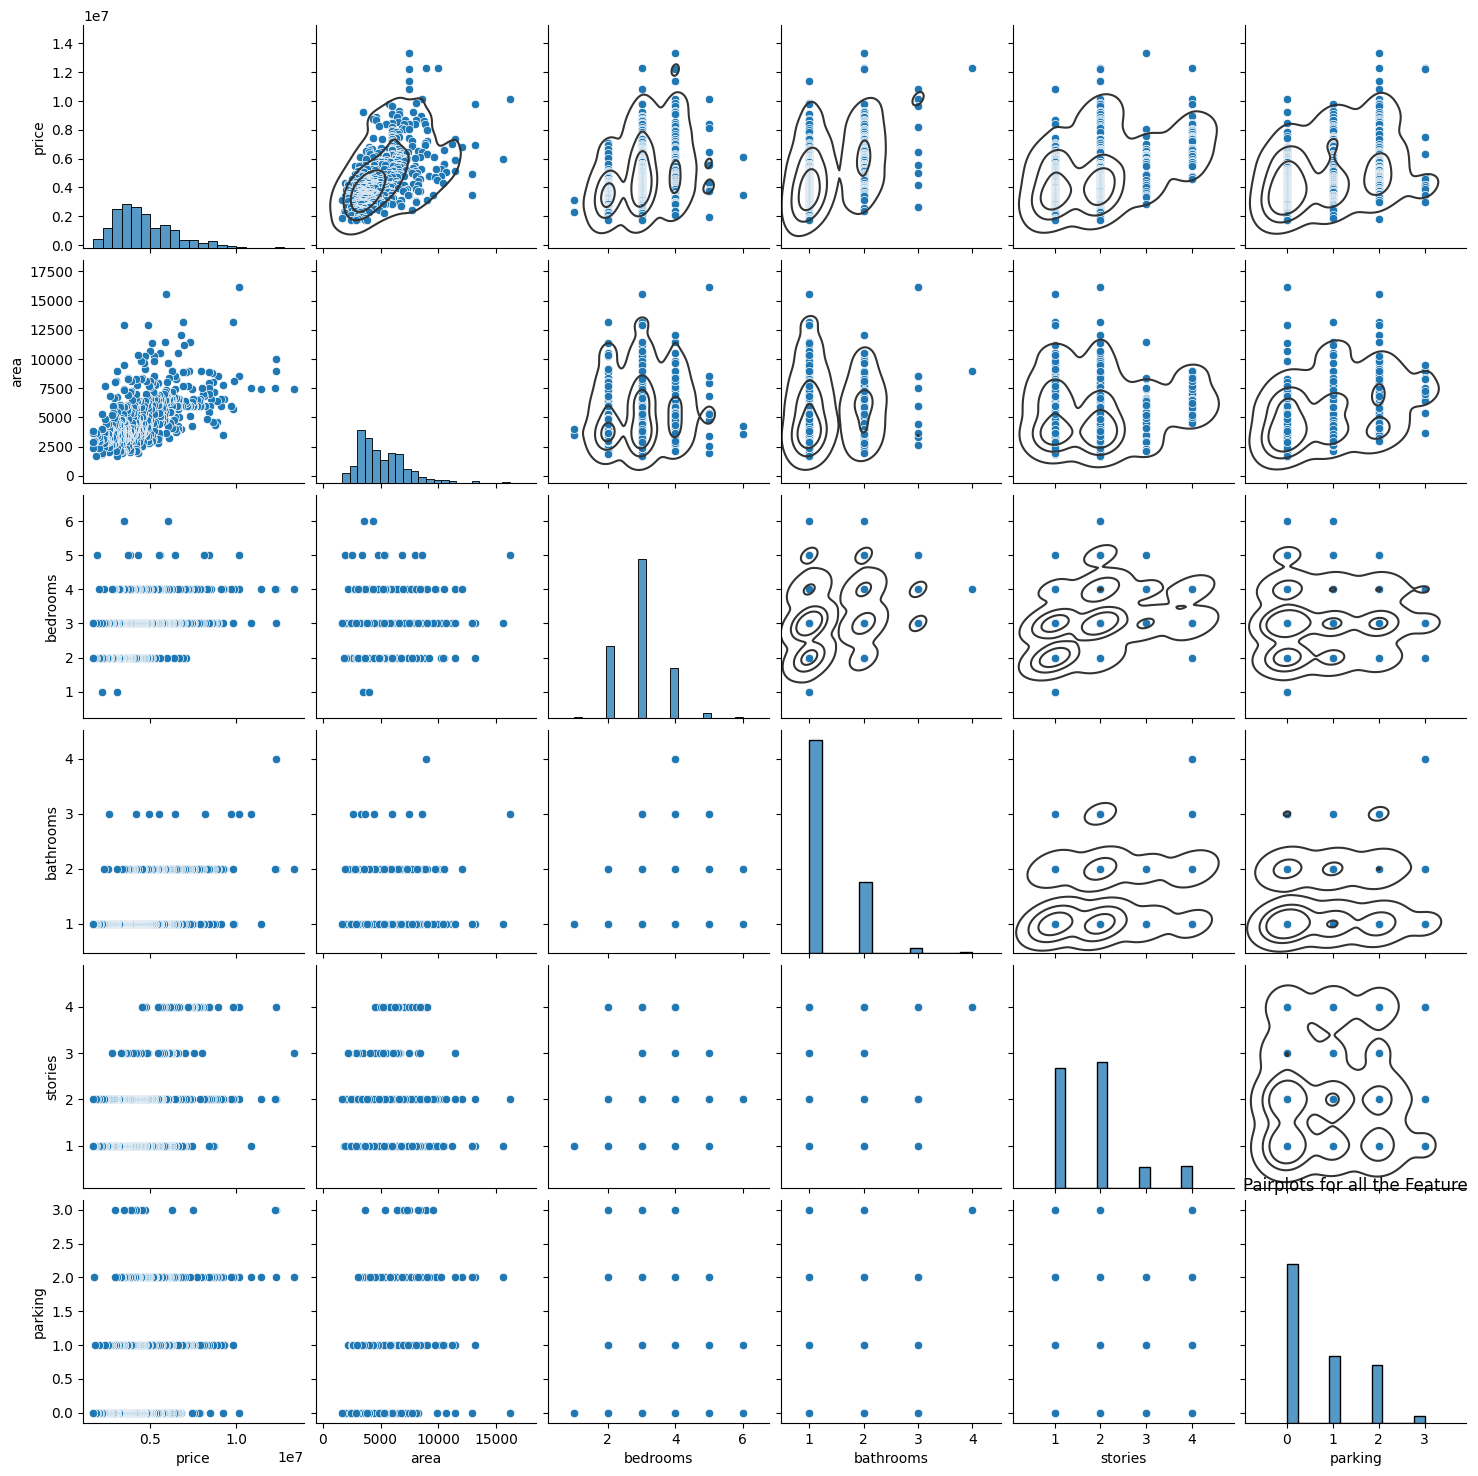

In [524]:
g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

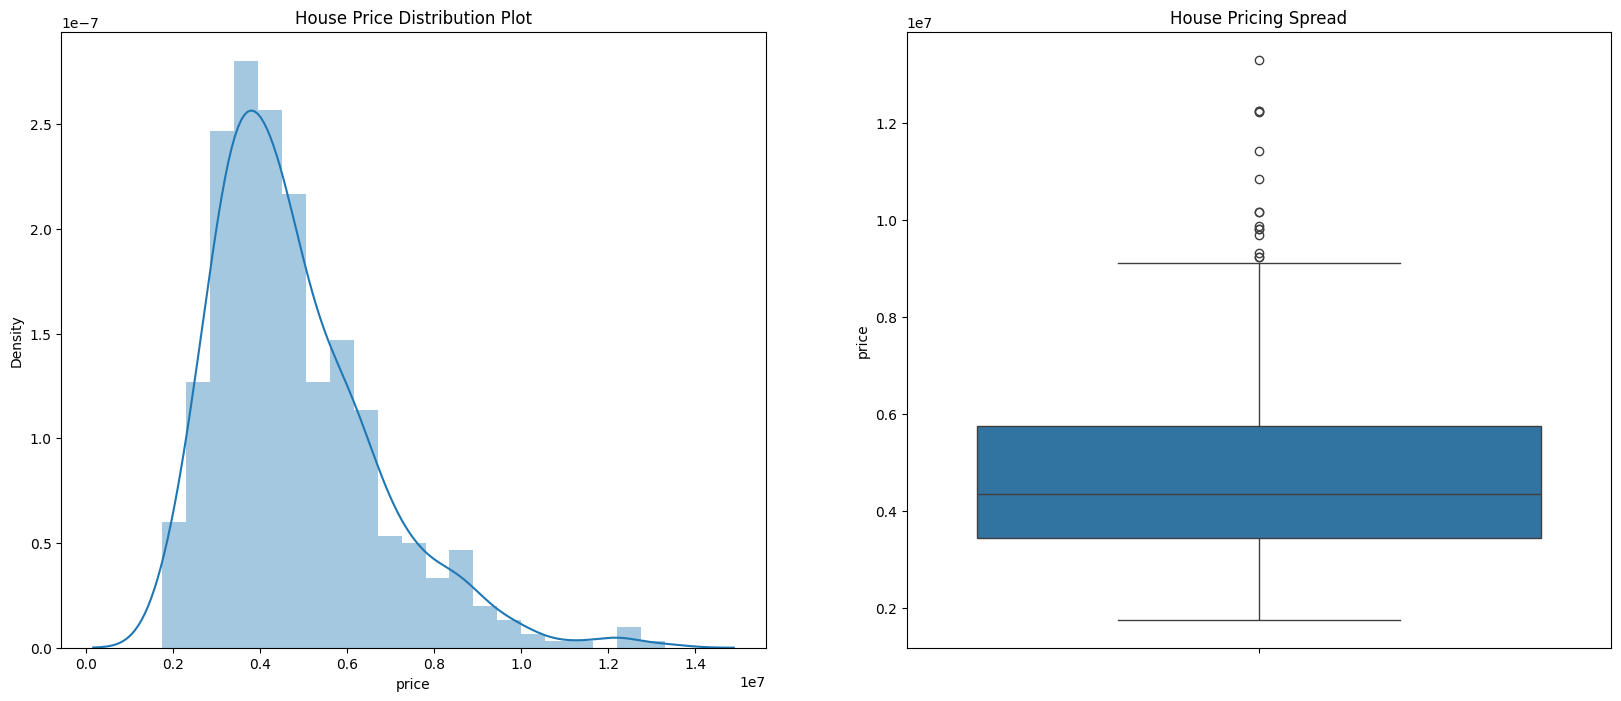

In [525]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('House Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
sns.boxplot(df.price)
plt.title('House Pricing Spread')

plt.show()

In [526]:
print(df.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
85%      6.615000e+06
90%      7.350000e+06
100%     1.330000e+07
max      1.330000e+07
Name: price, dtype: float64


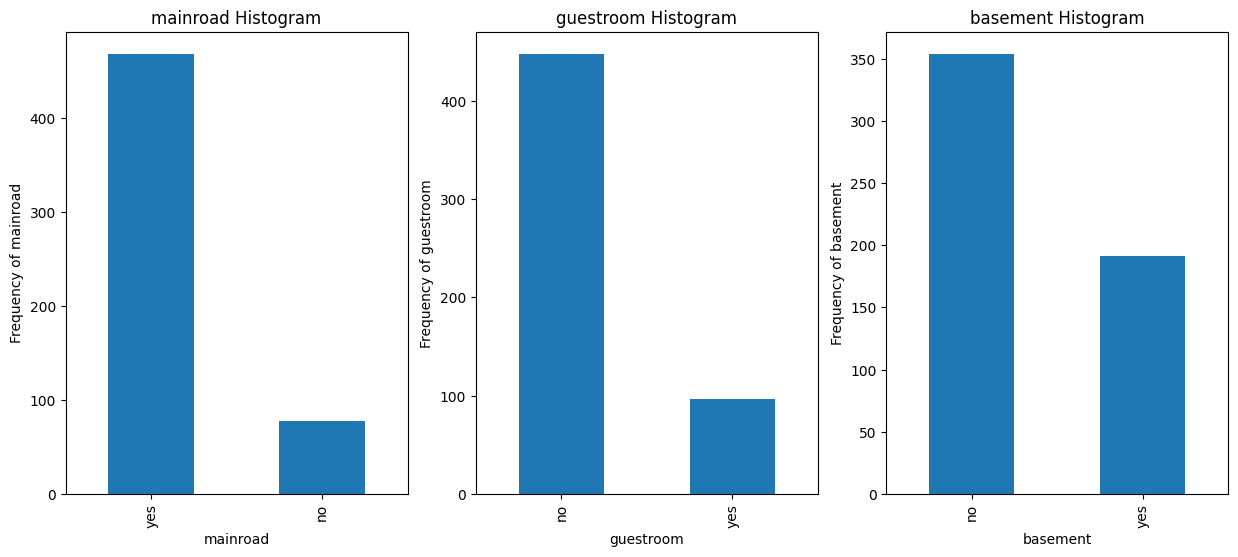

In [527]:
plt.figure(figsize=(15, 6))

plt.subplot(1,3,1)
plt1 = df['mainroad'].value_counts().plot(kind='bar')
plt.title('mainroad Histogram')
plt1.set(xlabel = 'mainroad', ylabel='Frequency of mainroad')

plt.subplot(1,3,2)
plt1 = df['guestroom'].value_counts().plot(kind='bar')
plt.title('guestroom Histogram')
plt1.set(xlabel = 'guestroom', ylabel='Frequency of guestroom')

plt.subplot(1,3,3)
plt1 = df['basement'].value_counts().plot(kind='bar')
plt.title('basement Histogram')
plt1.set(xlabel = 'basement', ylabel='Frequency of basement')

plt.show()

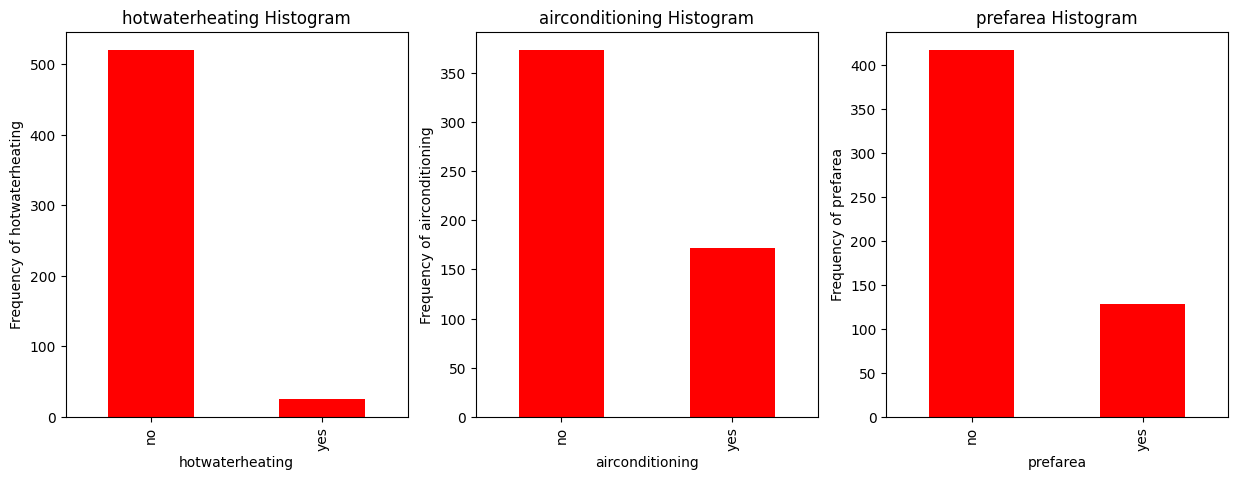

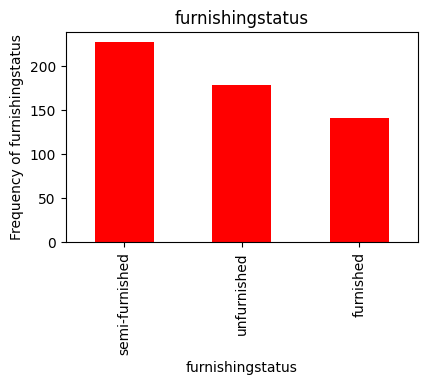

In [528]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt1 = df['hotwaterheating'].value_counts().plot(kind='bar',color='r')
plt.title('hotwaterheating Histogram')
plt1.set(xlabel = 'hotwaterheating', ylabel='Frequency of hotwaterheating')

plt.subplot(1, 3, 2)
plt1 = df['airconditioning'].value_counts().plot(kind='bar',color='r')
plt.title('airconditioning Histogram')
plt1.set(xlabel = 'airconditioning', ylabel='Frequency of airconditioning')

plt.subplot(1, 3, 3)
plt1 = df['prefarea'].value_counts().plot(kind='bar',color='r')
plt.title('prefarea Histogram')
plt1.set(xlabel = 'prefarea', ylabel='Frequency of prefarea')
plt.show()

plt.subplot(2, 2, 3)
plt1 = df['furnishingstatus'].value_counts().plot(kind='bar',color='r')
plt.title('furnishingstatus')
plt1.set(xlabel = 'furnishingstatus', ylabel='Frequency of furnishingstatus')
plt.show()

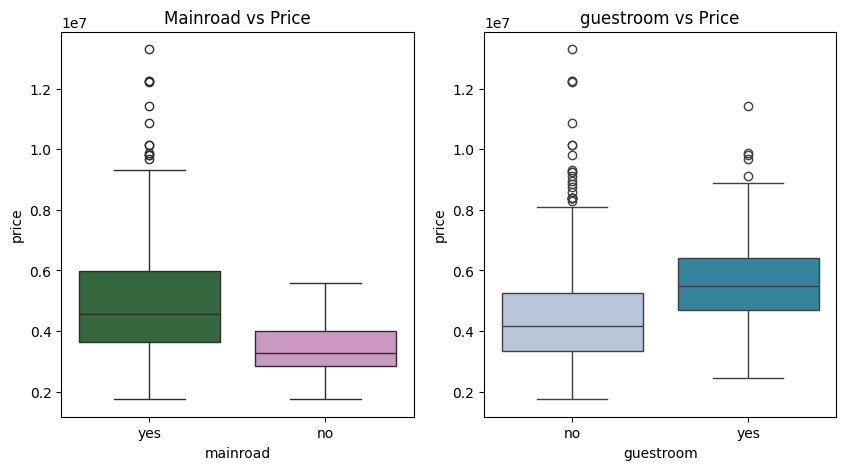

In [529]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Mainroad vs Price')
sns.boxplot(x=df.mainroad, y=df.price, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('guestroom vs Price')
sns.boxplot(x=df.guestroom, y=df.price, palette=("PuBuGn"))

plt.show()

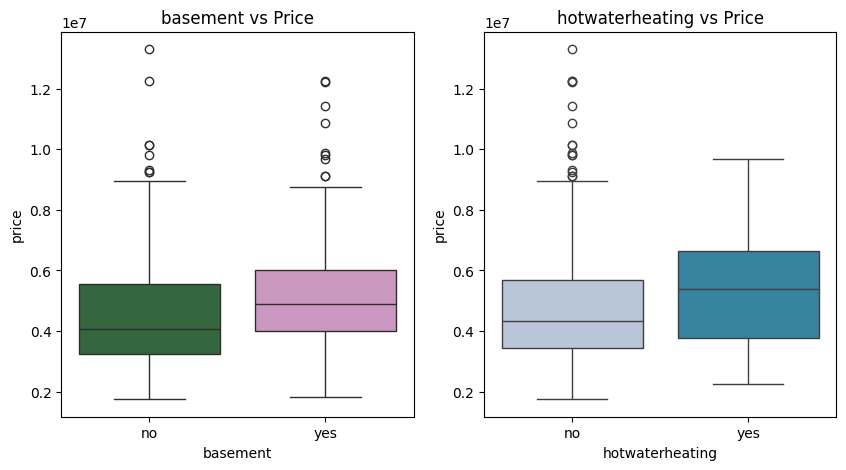

In [530]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('basement vs Price')
sns.boxplot(x=df.basement, y=df.price, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('hotwaterheating vs Price')
sns.boxplot(x=df.hotwaterheating, y=df.price, palette=("PuBuGn"))

plt.show()

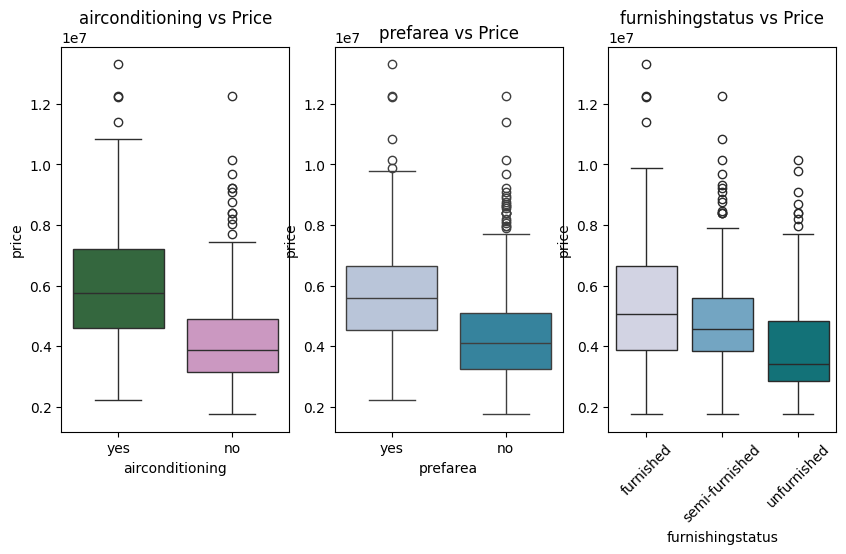

In [531]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.title('airconditioning vs Price')
sns.boxplot(x=df.airconditioning, y=df.price, palette=("cubehelix"))

plt.subplot(1,3,2)
plt.title('prefarea vs Price')
sns.boxplot(x=df.prefarea, y=df.price, palette=("PuBuGn"))

plt.subplot(1,3,3)
plt.title('furnishingstatus vs Price')
sns.boxplot(x=df.furnishingstatus, y=df.price, palette=("PuBuGn"))
plt.xticks(rotation=45)

plt.show()

In [532]:
categorical_list = [x for x in df.columns if df[x].dtype =='object']
for x in categorical_list: print(x)

mainroad
guestroom
basement
hotwaterheating
airconditioning
prefarea
furnishingstatus


In [533]:
numerical_list = [x for x in df.columns if df[x].dtype in ('int64','float64','str64')]
print(numerical_list)

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


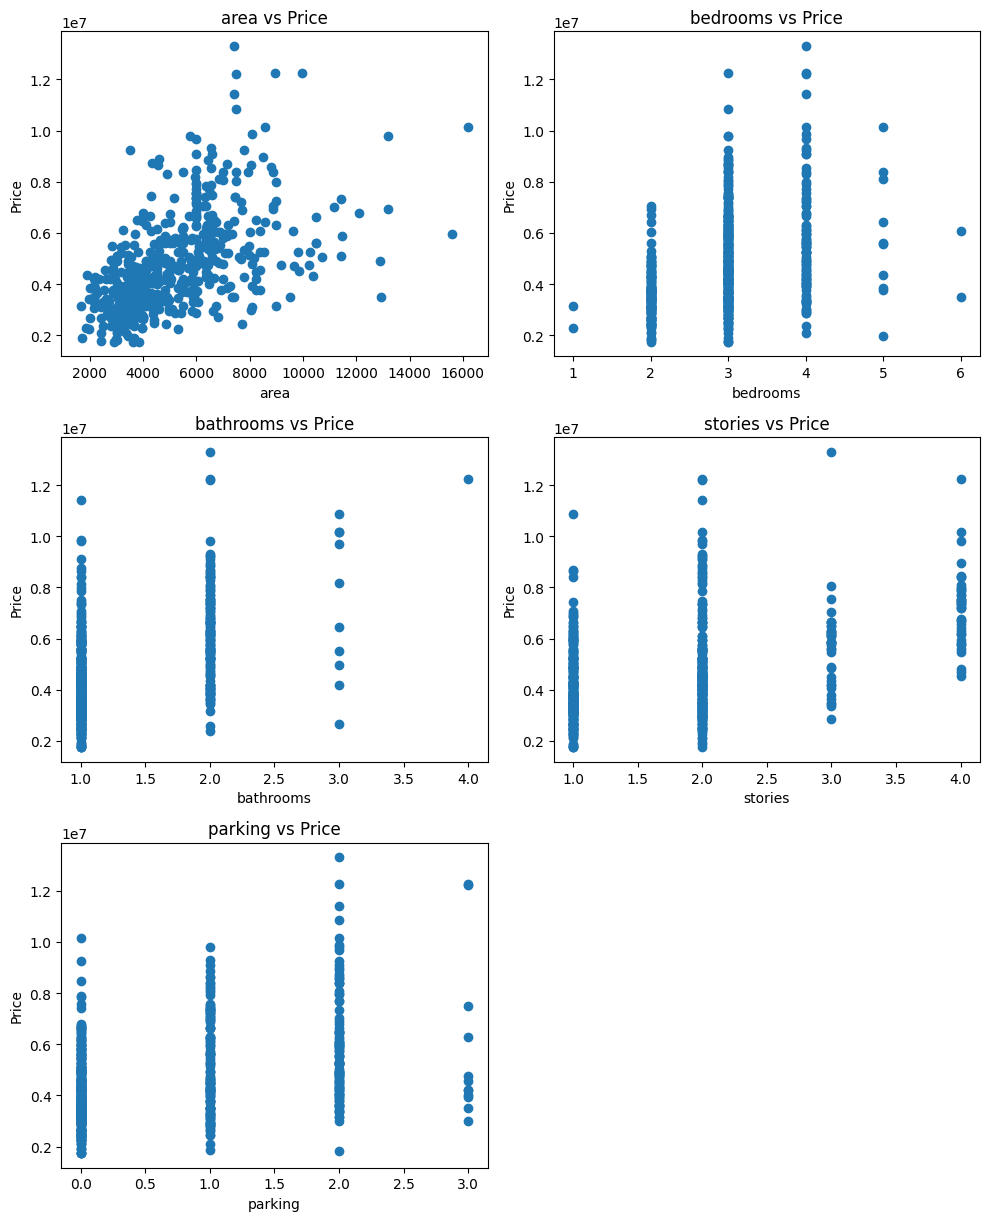

In [534]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('area', 1)
scatter('bedrooms', 2)
scatter('bathrooms', 3)
scatter('stories', 4)
scatter('parking',5)

plt.tight_layout()

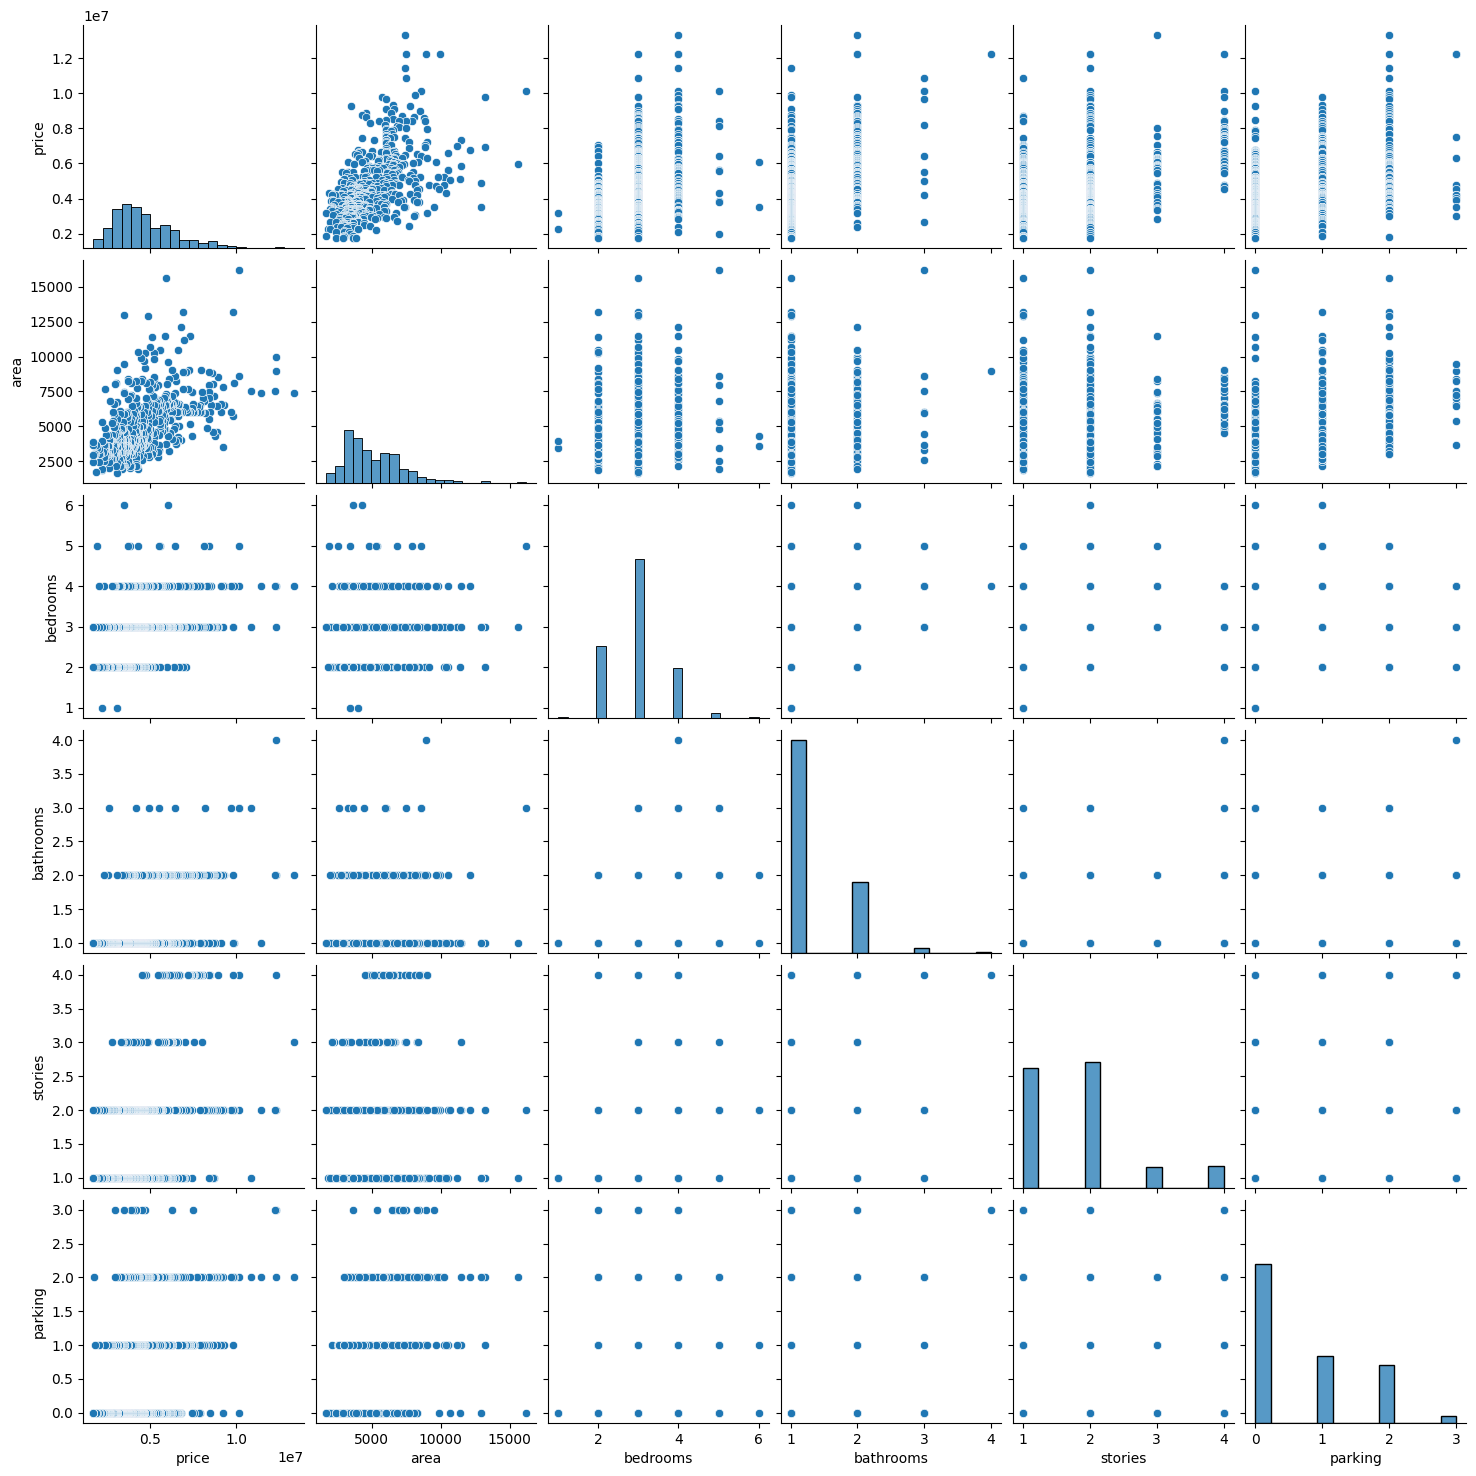

In [535]:
sns.pairplot(df)
plt.show()

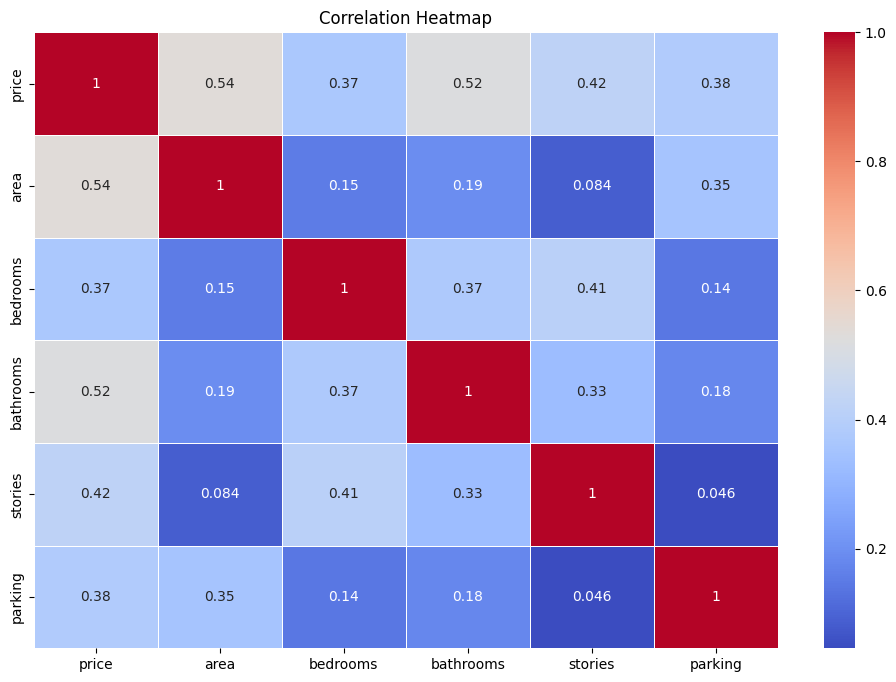

In [536]:
cor_matrix= df[numerical_list].corr()
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='area', ylabel='price'>

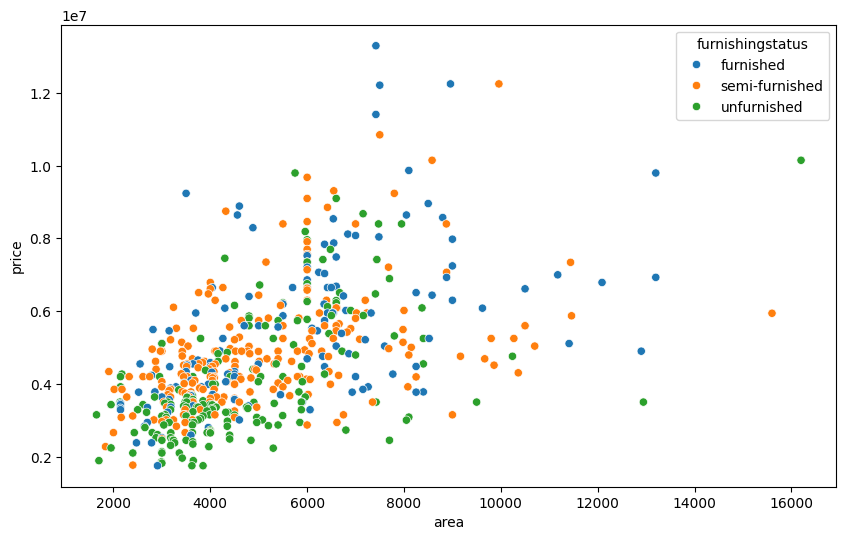

In [537]:
sns.scatterplot(y=df['price'],x=df['area'],hue=df['furnishingstatus'])

<Axes: xlabel='furnishingstatus', ylabel='price'>

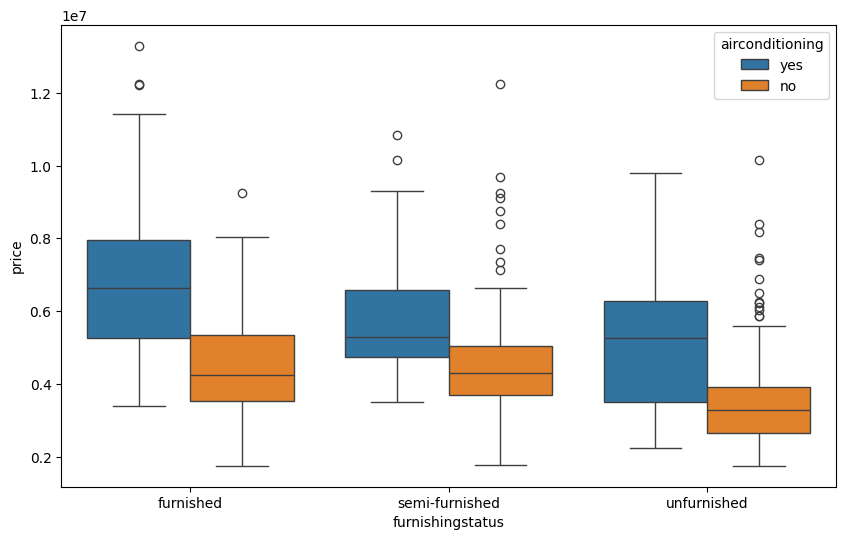

In [538]:
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = df)

<Axes: xlabel='area', ylabel='price'>

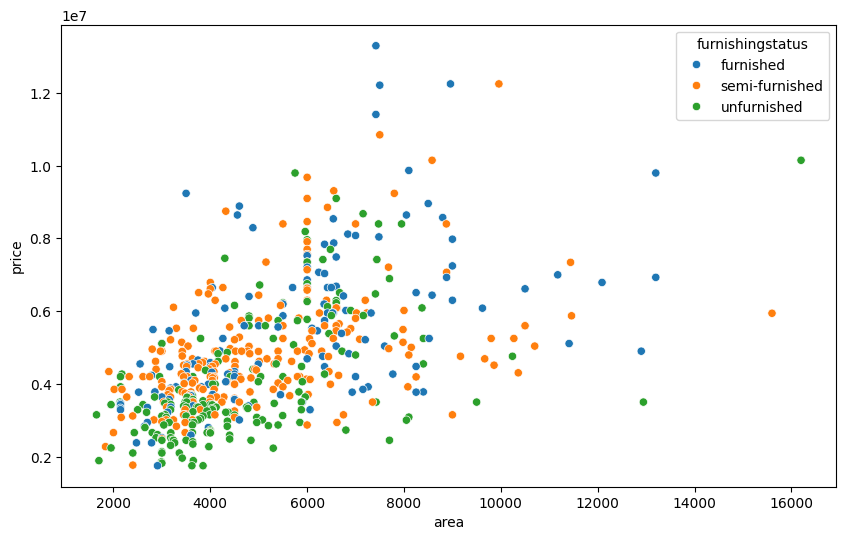

In [539]:
sns.scatterplot(y=df['price'],x=df['area'],hue=df['furnishingstatus'])

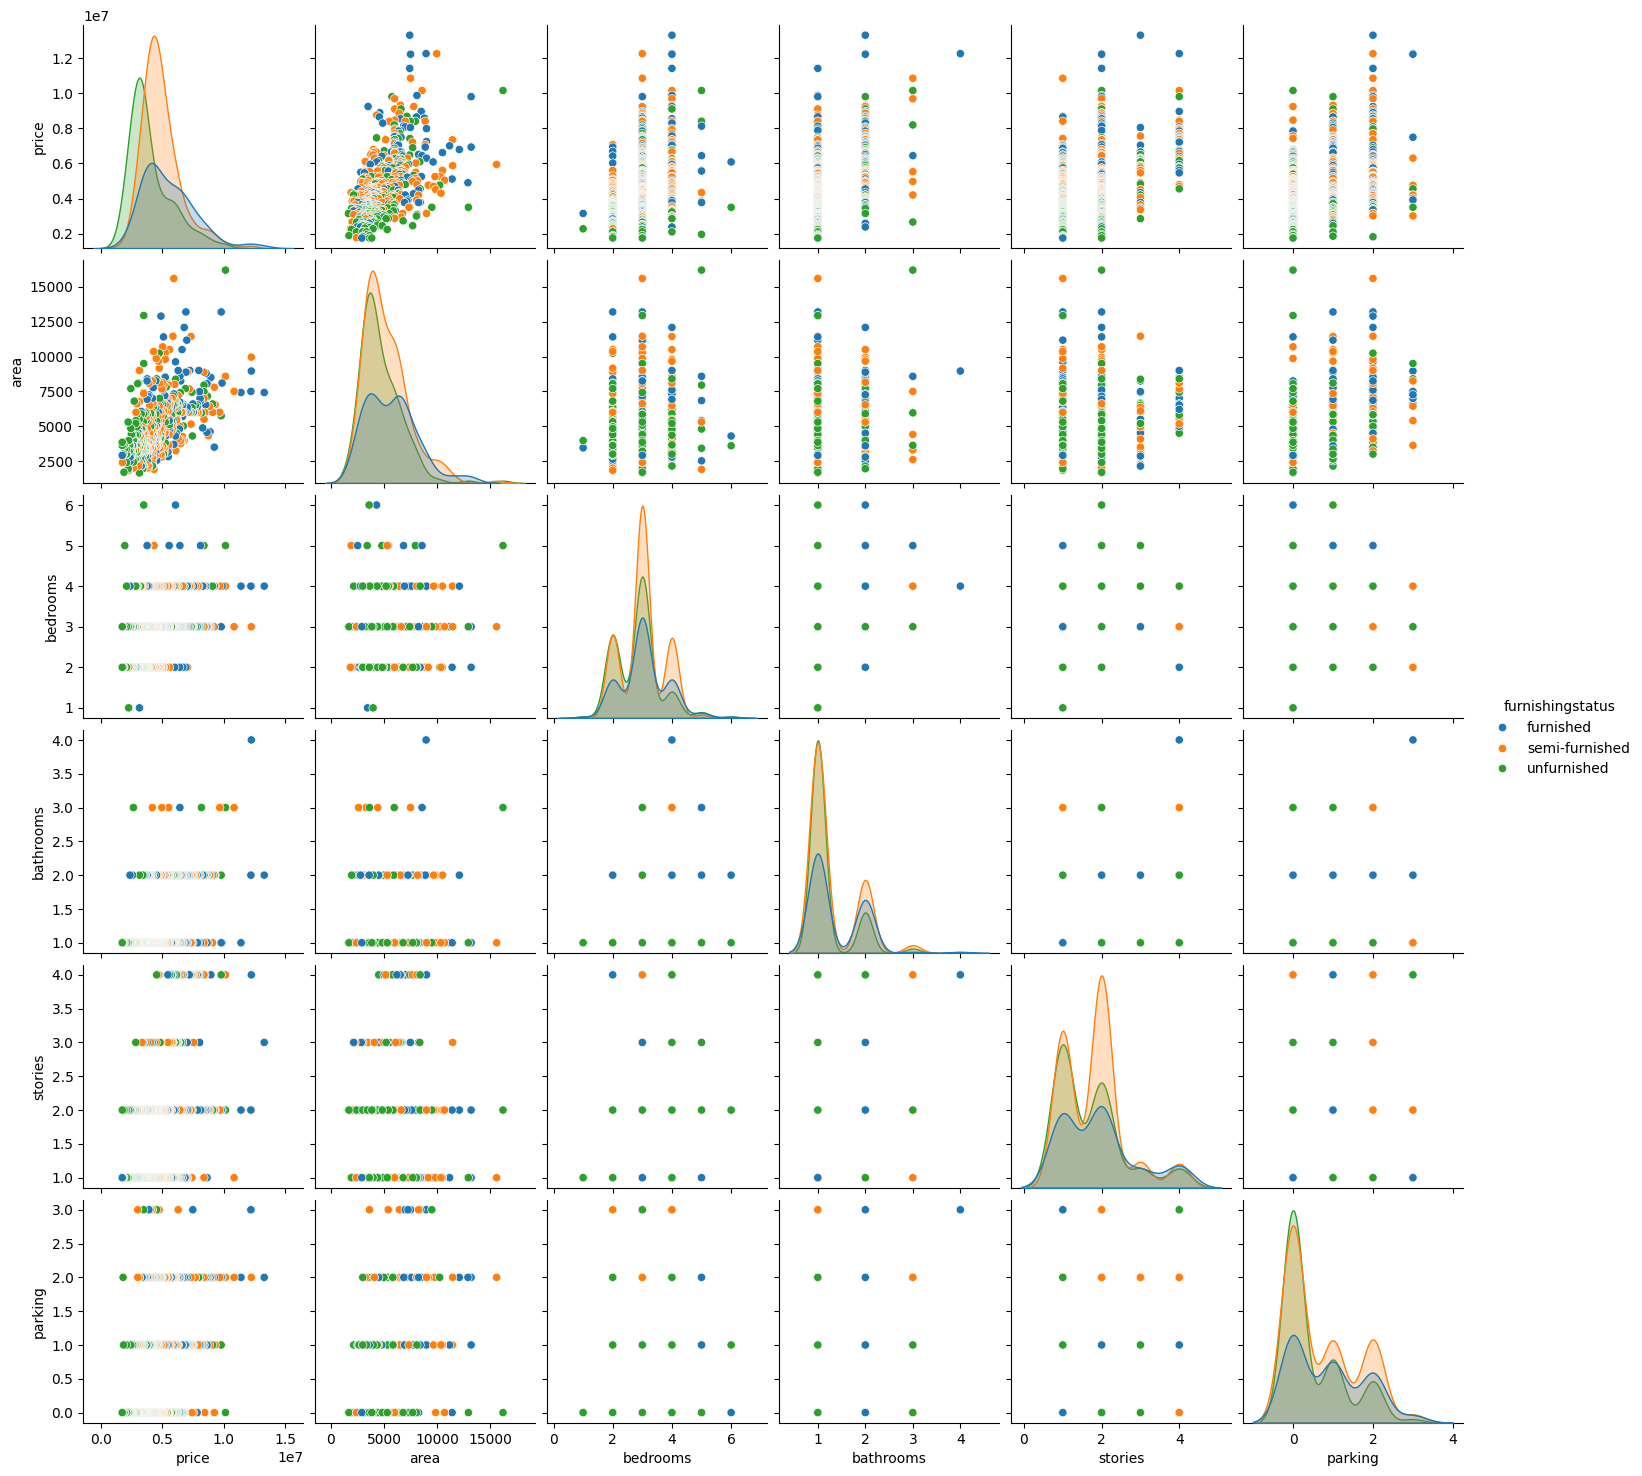

In [540]:
sns.pairplot(df,hue="furnishingstatus")

In [541]:
counter = 0
rs,cs = original_df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [542]:
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

                  Total Null Values  Percentage
price                             0         0.0
area                              0         0.0
bedrooms                          0         0.0
bathrooms                         0         0.0
stories                           0         0.0
mainroad                          0         0.0
guestroom                         0         0.0
basement                          0         0.0
hotwaterheating                   0         0.0
airconditioning                   0         0.0
parking                           0         0.0
prefarea                          0         0.0
furnishingstatus                  0         0.0


In [543]:
df3 = df.copy()

ecc = nvc[nvc['Percentage']!=0].index.values
fcc = [i for i in cf if i not in ecc]
#One-Hot Binary Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df3[i].nunique()<17):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
        
df3.shape

One-Hot Encoding on features:
hotwaterheating
basement
guestroom
mainroad
prefarea
airconditioning

Dummy Encoding on features:
furnishingstatus
bathrooms
stories
parking
bedrooms


(545, 24)

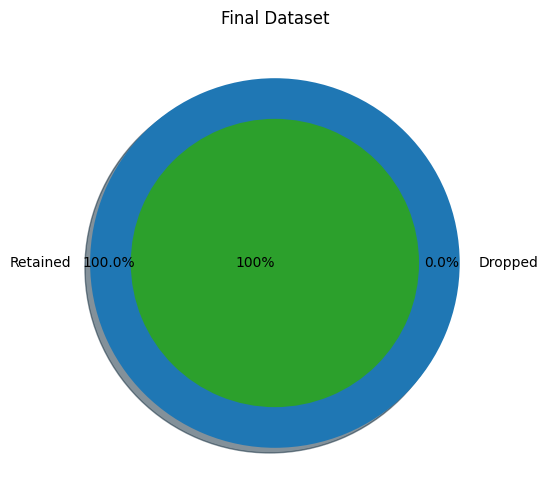


Inference: After the cleanup process, 0 samples were dropped, while retaining 0.0% of the data.


In [544]:
#Final Dataset size after performing Preprocessing
df1 = df3.copy()
df = df1.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_df.shape[0]-df.shape[0]} samples were dropped, \
while retaining {round(100 - (df.shape[0]*100/(original_df.shape[0])),2)}% of the data.')

In [545]:
#Splitting the data intro training & testing sets
m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_'))
    
df.columns = m
X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (545, 23) (545,) 
Training set  --->  (436, 23) (436,) 
Testing set   --->  (109, 23)  (109,)


In [546]:
#Feature Scaling (Standardization)
std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


area      mainroad     guestroom    basement  hotwaterheating  \
count  4.360000e+02  4.360000e+02  4.360000e+02  436.000000     4.360000e+02   
mean   4.481634e-17 -1.588943e-16 -8.148426e-18    0.000000    -4.481634e-17   
std    1.001149e+00  1.001149e+00  1.001149e+00    1.001149     1.001149e+00   
min   -1.540198e+00 -2.503331e+00 -4.558028e-01   -0.738985    -2.413554e-01   
25%   -7.389912e-01  3.994677e-01 -4.558028e-01   -0.738985    -2.413554e-01   
50%   -2.933591e-01  3.994677e-01 -4.558028e-01   -0.738985    -2.413554e-01   
75%    5.932510e-01  3.994677e-01 -4.558028e-01    1.353207    -2.413554e-01   
max    5.144981e+00  3.994677e-01  2.193931e+00    1.353207     4.143268e+00   

       airconditioning      prefarea  furnishingstatus_semi_furnished  \
count     4.360000e+02  4.360000e+02                     4.360000e+02   
mean      4.787200e-17 -5.296477e-17                    -4.685345e-17   
std       1.001149e+00  1.001149e+00                     1.001149e+00   
min      -6.553687e-01 -5.490834e-01                    -8.385255e-01   
25%      -6.553687e-01 -5.490834e-01                    -8.385255e-01   
50%      -6.553687e-01 -5.490834e-01                    -8.385255e-01   
75%       1.525859e+00 -5.490834e-01                     1.192570e+00   
max       1.525859e+00  1.821217e+00                     1.192570e+00   

       furnishingstatus_unfurnished   bathrooms_2  ...     stories_3  \
count                  4.360000e+02  4.360000e+02  ...  4.360000e+02   
mean                   1.059295e-16 -1.425975e-17  ... -2.851949e-17   
std                    1.001149e+00  1.001149e+00  ...  1.001149e+00   
min                   -6.986091e-01 -5.808815e-01  ... -2.954349e-01   
25%                   -6.986091e-01 -5.808815e-01  ... -2.954349e-01   
50%                   -6.986091e-01 -5.808815e-01  ... -2.954349e-01   
75%                    1.431416e+00  1.721522e+00  ... -2.954349e-01   
max                    1.431416e+00  1.721522e+00  ...  3.384840e+00   

          stories_4     parking_1     parking_2     parking_3    bedrooms_2  \
count  4.360000e+02  4.360000e+02  4.360000e+02  4.360000e+02  4.360000e+02   
mean  -2.444528e-17  5.296477e-17 -1.629685e-17  1.629685e-17 -2.037106e-17   
std    1.001149e+00  1.001149e+00  1.001149e+00  1.001149e+00  1.001149e+00   
min   -2.908214e-01 -5.844129e-01 -5.064426e-01 -1.532129e-01 -5.808815e-01   
25%   -2.908214e-01 -5.844129e-01 -5.064426e-01 -1.532129e-01 -5.808815e-01   
50%   -2.908214e-01 -5.844129e-01 -5.064426e-01 -1.532129e-01 -5.808815e-01   
75%   -2.908214e-01  1.711119e+00 -5.064426e-01 -1.532129e-01  1.721522e+00   
max    3.438536e+00  1.711119e+00  1.974557e+00  6.526868e+00  1.721522e+00   

         bedrooms_3    bedrooms_4    bedrooms_5    bedrooms_6  
count  4.360000e+02  4.360000e+02  4.360000e+02  4.360000e+02  
mean   1.018553e-16  6.111319e-18 -1.018553e-17  1.629685e-17  
std    1.001149e+00  1.001149e+00  1.001149e+00  1.001149e+00  
min   -1.137865e+00 -4.336022e-01 -1.277381e-01 -6.788442e-02  
25%   -1.137865e+00 -4.336022e-01 -1.277381e-01 -6.788442e-02  
50%    8.788388e-01 -4.336022e-01 -1.277381e-01 -6.788442e-02  
75%    8.788388e-01 -4.336022e-01 -1.277381e-01 -6.788442e-02  
max    8.788388e-01  2.306261e+00  7.828519e+00  1.473092e+01  

[8 rows x 23 columns]


                                          Standardardization on Testing set                                          


area    mainroad   guestroom    basement  hotwaterheating  \
count  109.000000  109.000000  109.000000  109.000000       109.000000   
mean     0.012148   -0.053262    0.079006   -0.028792        -0.201129   
std      1.049393    1.058060    1.068435    0.995276         0.419971   
min     -1.626765   -2.503331   -0.455803   -0.738985        -0.241355   
25%     -0.705249    0.399468   -0.455803   -0.738985        -0.241355   
50%     -0.090905    0.399468   -0.455803   -0.738985        -0.241355   
75%      0.537402    0.399468   -0.455803    1.353207        -0.241355   
max      4.865734    0.399468    2.193931    1.353207         4.143268   

       airconditioning    prefarea  furnishingstatus_semi_furnished  \
count       109.000000  109.000000                       109.000000   
mean          0.165093    0.038055                         0.037268   
std           1.061505    1.027938                         1.010532   
min          -0.655369   -0.549083                        -0.838525   
25%          -0.655369   -0.549083                        -0.838525   
50%          -0.655369   -0.549083                        -0.838525   
75%           1.525859   -0.549083                         1.192570   
max           1.525859    1.821217                         1.192570   

       furnishingstatus_unfurnished  bathrooms_2  ...   stories_3   stories_4  \
count                    109.000000   109.000000  ...  109.000000  109.000000   
mean                      -0.014656    -0.095053  ...   -0.160379   -0.051321   
std                        0.999101     0.943777  ...    0.695152    0.918455   
min                       -0.698609    -0.580881  ...   -0.295435   -0.290821   
25%                       -0.698609    -0.580881  ...   -0.295435   -0.290821   
50%                       -0.698609    -0.580881  ...   -0.295435   -0.290821   
75%                        1.431416    -0.580881  ...   -0.295435   -0.290821   
max                        1.431416     1.721522  ...    3.384840    3.438536   

        parking_1   parking_2   parking_3  bedrooms_2  bedrooms_3  bedrooms_4  \
count  109.000000  109.000000  109.000000  109.000000  109.000000  109.000000   
mean    -0.268514   -0.073975   -0.030643   -0.031684   -0.138764    0.219943   
std      0.794452    0.945583    0.900665    0.985784    1.012967    1.173085   
min     -0.584413   -0.506443   -0.153213   -0.580881   -1.137865   -0.433602   
25%     -0.584413   -0.506443   -0.153213   -0.580881   -1.137865   -0.433602   
50%     -0.584413   -0.506443   -0.153213   -0.580881   -1.137865   -0.433602   
75%     -0.584413   -0.506443   -0.153213   -0.580881    0.878839   -0.433602   
max      1.711119    1.974557    6.526868    1.721522    0.878839    2.306261   

       bedrooms_5    bedrooms_6  
count  109.000000  1.090000e+02  
mean     0.091241 -6.788442e-02  
std      1.307667  1.394189e-17  
min     -0.127738 -6.788442e-02  
25%     -0.127738 -6.788442e-02  
50%     -0.127738 -6.788442e-02  
75%     -0.127738 -6.788442e-02  
max      7.828519 -6.788442e-02  

[8 rows x 23 columns]

                                       Correlation Matrix                                       


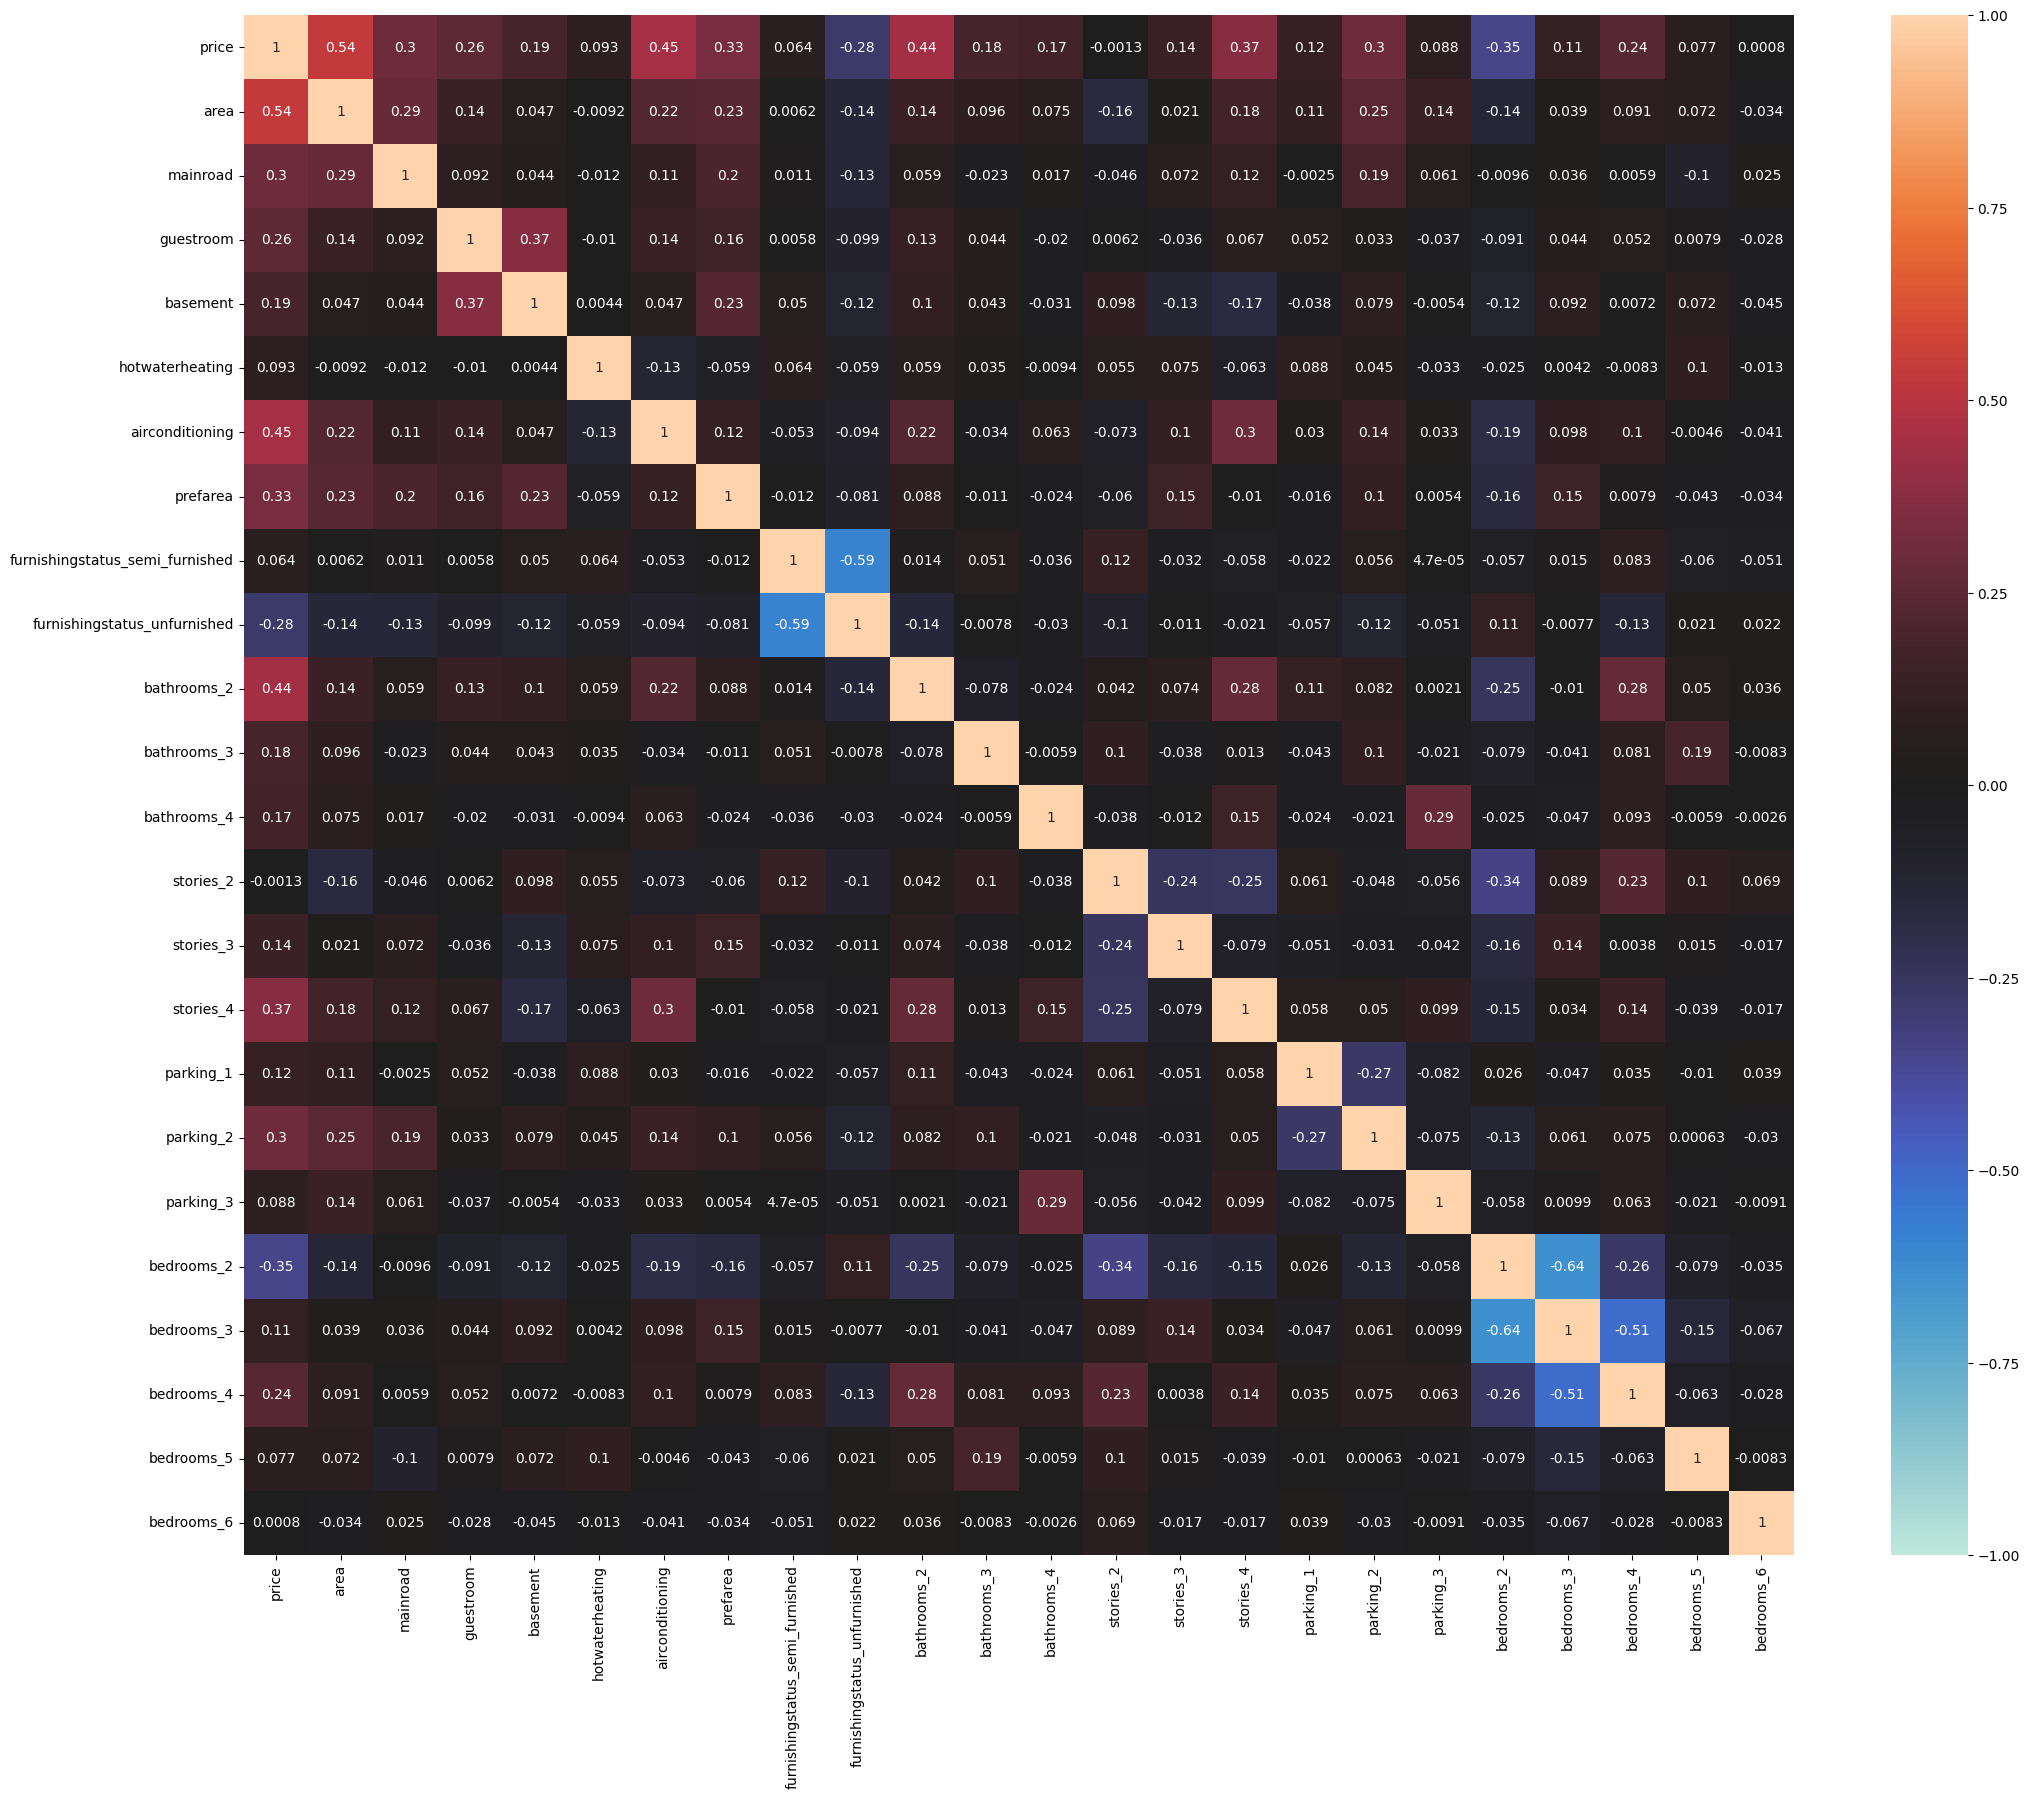

In [547]:
#Checking the correlation
print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[25,20])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

In [548]:
#Testing a Linear Regression model with statsmodels
Train_xy = pd.concat([Train_X_std,Train_Y.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in Train_X.columns)), data=Train_xy).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     39.72
Date:                Thu, 29 May 2025   Prob (F-statistic):           1.31e-89
Time:                        01:34:51   Log-Likelihood:                -6659.2
No. Observations:                 436   AIC:                         1.337e+04
Df Residuals:                     412   BIC:                         1.346e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        4.796e+06   5.12e+04     93.614      0.000     4.7e+06     4.9e+06
area                             5.061e+05   6.13e+04      8.252      0.000    3.86e+05    6.27e+05
mainroad                         2.025e+05   5.64e+04      3.593      0.000    9.17e+04    3.13e+05
guestroom                        1.395e+05   5.71e+04      2.441      0.015    2.71e+04    2.52e+05
basement                         1.334e+05   6.03e+04      2.213      0.027    1.49e+04    2.52e+05
hotwaterheating                  1.886e+05   5.36e+04      3.516      0.000    8.32e+04    2.94e+05
airconditioning                  3.728e+05   5.76e+04      6.471      0.000     2.6e+05    4.86e+05
prefarea                         2.462e+05   5.61e+04      4.386      0.000    1.36e+05    3.57e+05
furnishingstatus_semi_furnished -3.031e+04   6.55e+04     -0.462      0.644   -1.59e+05    9.85e+04
furnishingstatus_unfurnished    -1.988e+05   6.61e+04     -3.007      0.003   -3.29e+05   -6.89e+04
bathrooms_2                      4.408e+05   5.93e+04      7.429      0.000    3.24e+05    5.57e+05
bathrooms_3                      3.058e+05   5.51e+04      5.552      0.000    1.98e+05    4.14e+05
bathrooms_4                      2.776e+05    5.5e+04      5.044      0.000    1.69e+05    3.86e+05
stories_2                        1.261e+05   6.88e+04      1.833      0.068   -9165.961    2.61e+05
stories_3                         1.97e+05    6.2e+04      3.180      0.002    7.52e+04    3.19e+05
stories_4                        3.435e+05   6.49e+04      5.290      0.000    2.16e+05    4.71e+05
parking_1                        1.512e+05   5.69e+04      2.658      0.008    3.94e+04    2.63e+05
parking_2                        2.446e+05    5.9e+04      4.148      0.000    1.29e+05    3.61e+05
parking_3                       -3.722e+04   5.63e+04     -0.661      0.509   -1.48e+05    7.34e+04
bedrooms_2                      -4.602e+04   3.34e+05     -0.138      0.890   -7.02e+05     6.1e+05
bedrooms_3                       9.704e+04   3.83e+05      0.253      0.800   -6.56e+05     8.5e+05
bedrooms_4                       5.335e+04   2.87e+05      0.186      0.853   -5.11e+05    6.18e+05
bedrooms_5                       4.557e+04   1.12e+05      0.408      0.684   -1.74e+05    2.65e+05
bedrooms_6                       5.355e+04   7.33e+04      0.731      0.465   -9.04e+04    1.98e+05
==============================================================================
Omnibus:                       90.465   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              277.290
Skew:                           0.952   Prob(JB):                     6.13e-61
Kurtosis:                       6.412   Cond. No.                  

Fitting 5 folds for each of 5 candidates, totalling 25 fits


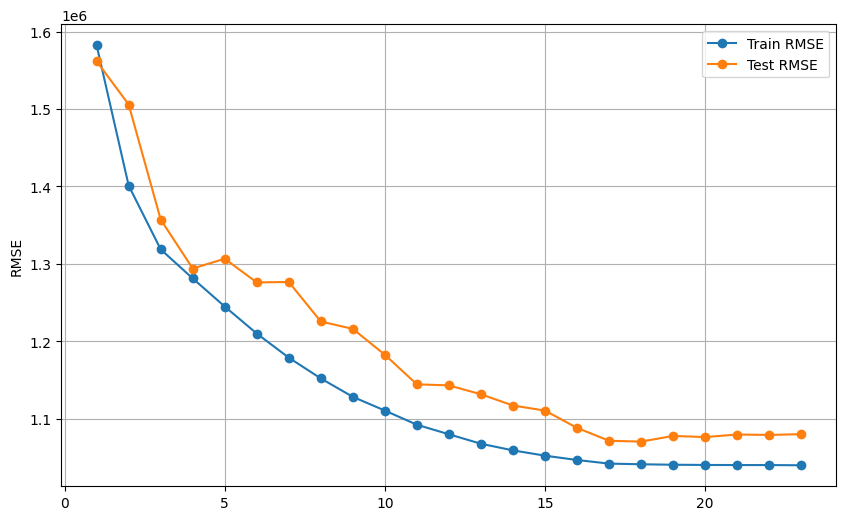

In [549]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(Train_X_std, Train_Y)

best_alpha = grid_search.best_params_['ridge__alpha']


Trr = []
Tss = []
m = Train_X_std.shape[1]  

for i in range(m):
    ridge = Ridge(alpha=best_alpha)
    rfe = RFE(ridge, n_features_to_select=m - i)
    rfe = rfe.fit(Train_X_std, Train_Y)

    selected_features = Train_X_std.columns[rfe.support_]
    X_train_sel = Train_X_std.loc[:, selected_features]
    X_test_sel = Test_X_std.loc[:, selected_features]

    ridge.fit(X_train_sel, Train_Y)

    pred_train = ridge.predict(X_train_sel)
    pred_test = ridge.predict(X_test_sel)

    train_rmse = np.sqrt(mean_squared_error(Train_Y, pred_train))
    test_rmse = np.sqrt(mean_squared_error(Test_Y, pred_test))

    Trr.append(train_rmse)
    Tss.append(test_rmse)


plt.plot(range(m, 0, -1), Trr, marker='o', label='Train RMSE')
plt.plot(range(m, 0, -1), Tss, marker='o', label='Test RMSE')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()

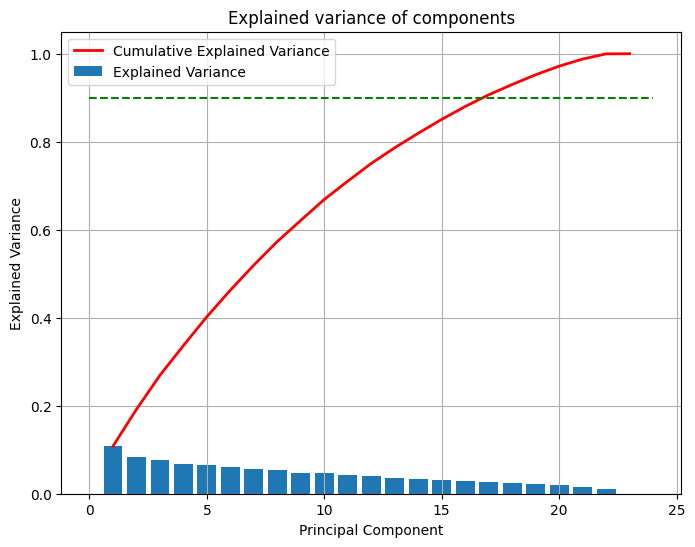

In [550]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.9,0.9],'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.legend()
plt.grid()
plt.show()

In [551]:
lm = LinearRegression()
rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-5)             # running RFE
rfe = rfe.fit(Train_X_std, Train_Y)

LR = LinearRegression()
LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

print(np.sqrt(mean_squared_error(Train_Y, pred1)))
print(np.sqrt(mean_squared_error(Test_Y, pred2)))


1041159.9759374518
1071175.3589004255


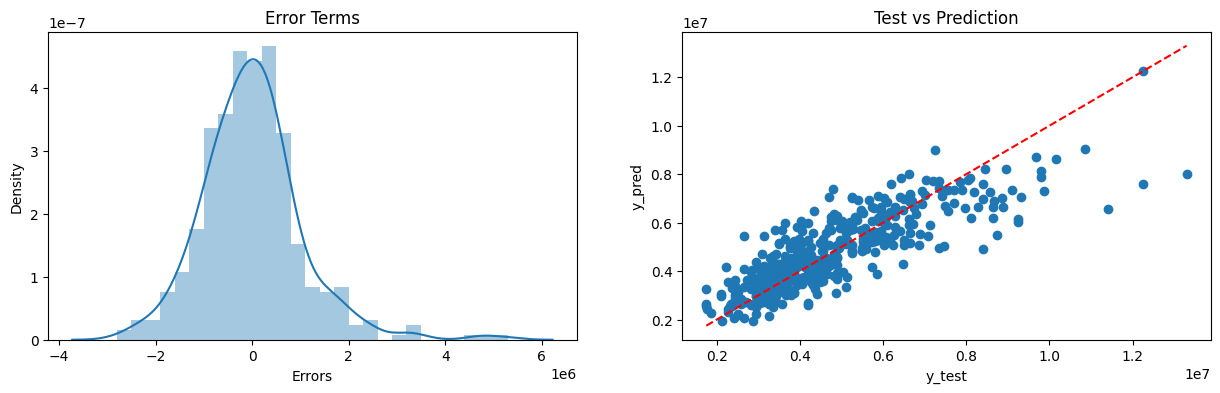

In [552]:
plt.figure(figsize=[15, 4])

plt.subplot(1, 2, 1)
sns.distplot((Train_Y - pred1), kde=True)  
plt.title('Error Terms')
plt.xlabel('Errors')

plt.subplot(1, 2, 2)
plt.scatter(Train_Y, pred1)
plt.plot([Train_Y.min(), Train_Y.max()], [Train_Y.min(), Train_Y.max()], 'r--')
plt.title('Test vs Prediction')
plt.xlabel('y_test')
plt.ylabel('y_pred')

plt.show()


In [553]:
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

Text(0.5, 0, 'Errors')

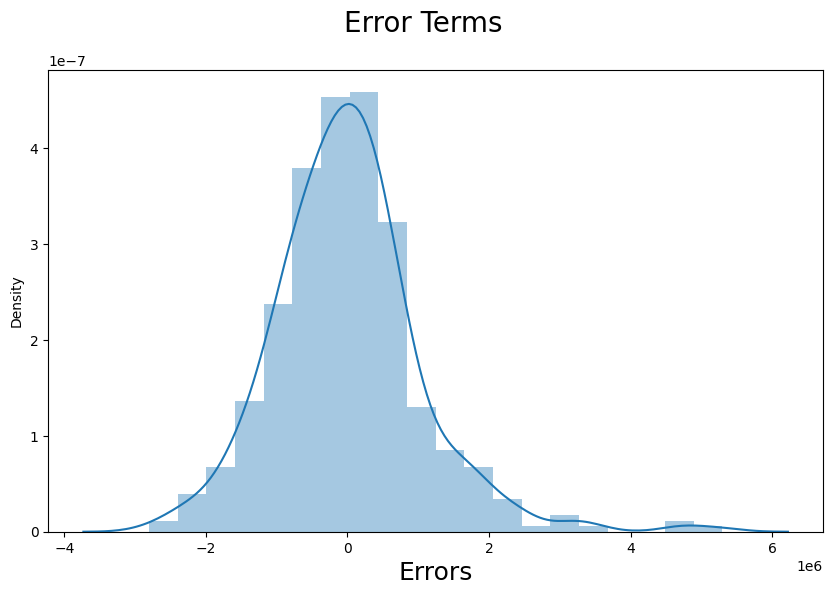

In [554]:
fig = plt.figure()
sns.distplot((Train_Y - pred1), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)   

In [555]:
print(df.columns.tolist())

['price', 'area', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus_semi_furnished', 'furnishingstatus_unfurnished', 'bathrooms_2', 'bathrooms_3', 'bathrooms_4', 'stories_2', 'stories_3', 'stories_4', 'parking_1', 'parking_2', 'parking_3', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6']


<Axes: xlabel='airconditioning', ylabel='guestroom'>

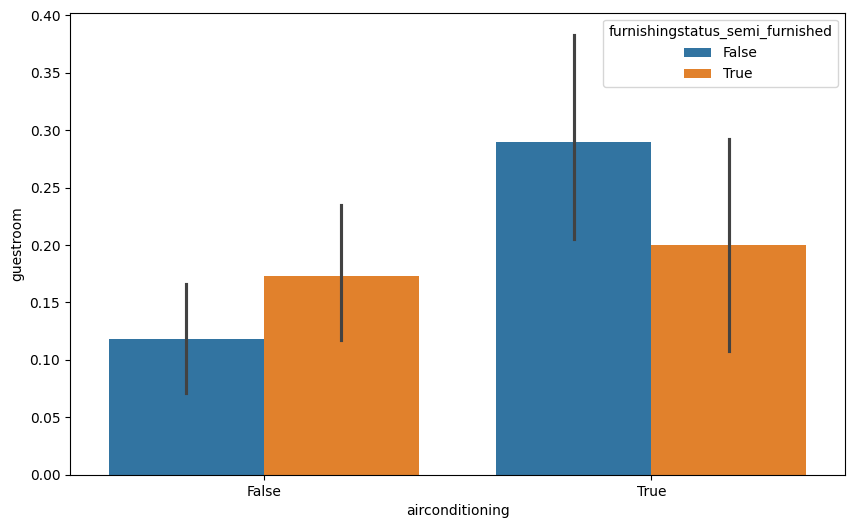

In [556]:
sns.barplot(x=df['airconditioning'],y=df['guestroom'],hue=df["furnishingstatus_semi_furnished"])

<Axes: xlabel='airconditioning', ylabel='guestroom'>

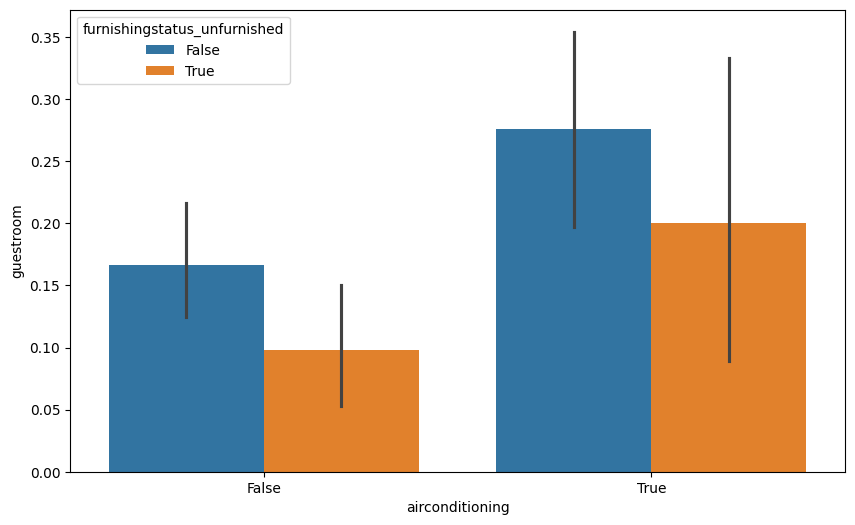

In [557]:
sns.barplot(x=df['airconditioning'],y=df['guestroom'],hue=df["furnishingstatus_unfurnished"])

<Axes: xlabel='hotwaterheating', ylabel='bathrooms_2'>

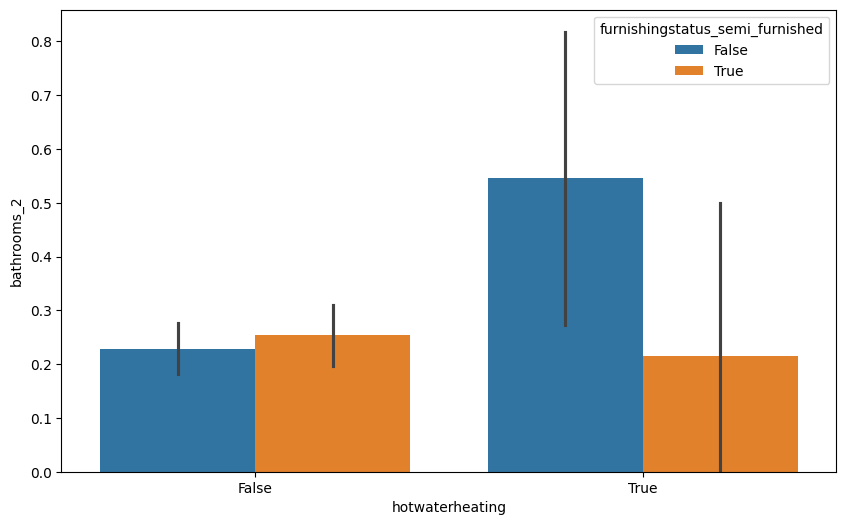

In [558]:
sns.barplot(x=df['hotwaterheating'],y=df['bathrooms_2'],hue=df["furnishingstatus_semi_furnished"])

<Axes: xlabel='hotwaterheating', ylabel='bathrooms_2'>

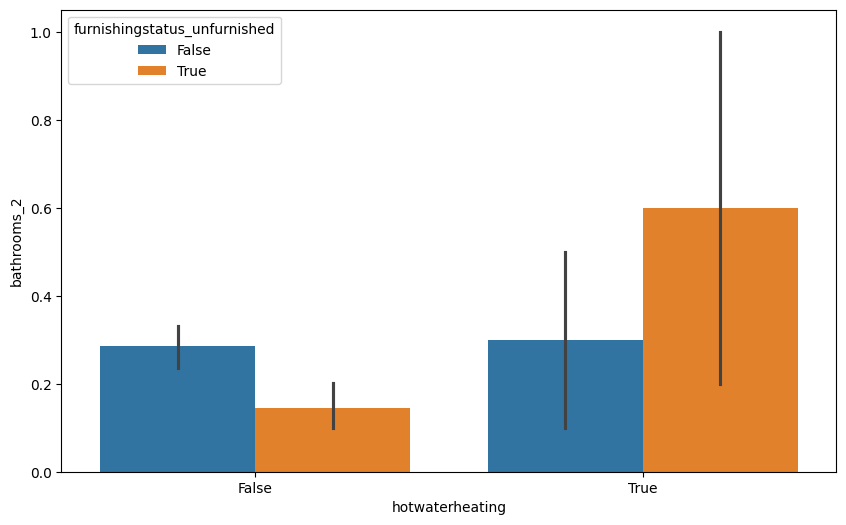

In [559]:
sns.barplot(x=df['hotwaterheating'],y=df['bathrooms_2'],hue=df["furnishingstatus_unfurnished"])

<Axes: xlabel='furnishingstatus_semi_furnished', ylabel='price'>

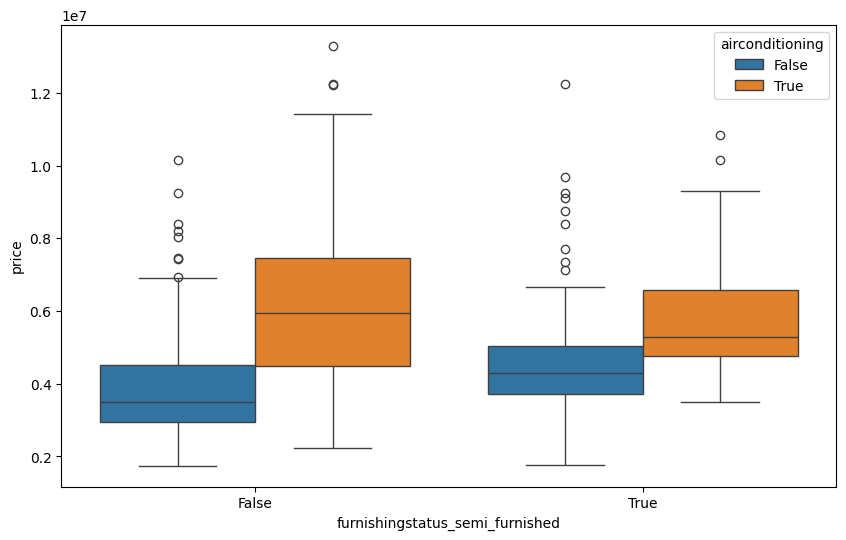

In [560]:
sns.boxplot(x = 'furnishingstatus_semi_furnished', y = 'price', hue = 'airconditioning', data = df)

<Axes: xlabel='furnishingstatus_unfurnished', ylabel='price'>

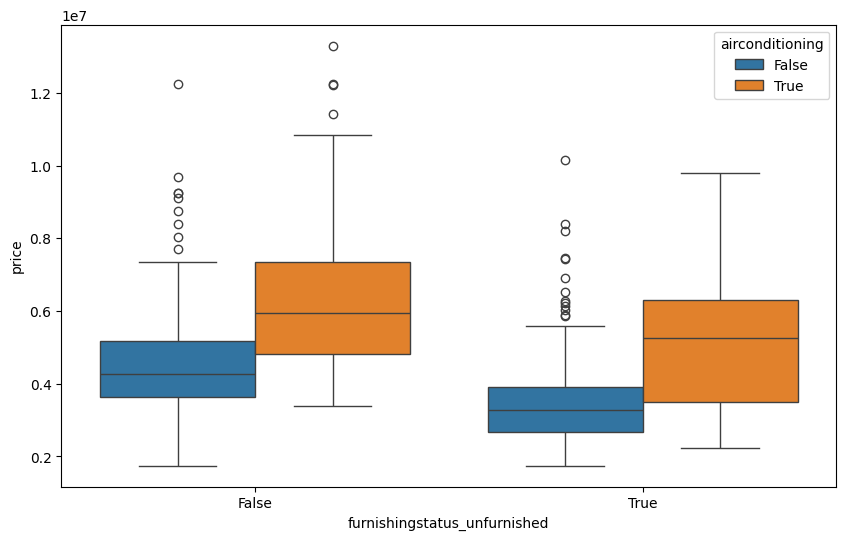

In [561]:
sns.boxplot(x = 'furnishingstatus_unfurnished', y = 'price', hue = 'airconditioning', data = df)

{'whiskers': [<matplotlib.lines.Line2D at 0x27736e6fc50>,
 'caps': [<matplotlib.lines.Line2D at 0x27736e6fed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27736e6fb10>],
 'medians': [<matplotlib.lines.Line2D at 0x276e6888190>],
 'fliers': [<matplotlib.lines.Line2D at 0x276e68882d0>],
 'means': []}

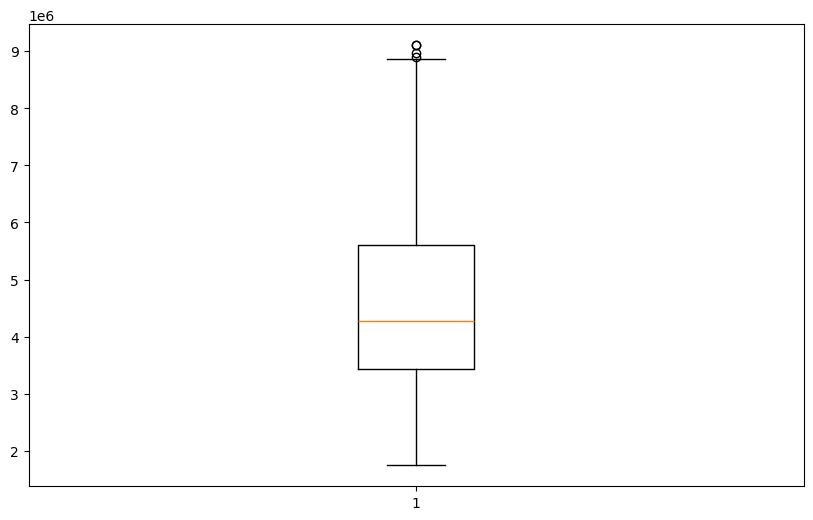

In [562]:
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

plt.boxplot(df.price)

In [563]:
status = pd.get_dummies(data[['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']], drop_first = True)
data = pd.concat([data, status], axis = 1)
data.drop(['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], axis = 1, inplace = True)

data.head()

price  area  bedrooms  bathrooms  stories  parking  \
0  13300000  7420         4          2        3        2   
1  12250000  8960         4          4        4        3   
2  12250000  9960         3          2        2        2   
3  12215000  7500         4          2        2        3   
4  11410000  7420         4          1        2        2   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  \
0                            False                         False   
1                            False                         False   
2                             True                         False   
3                            False                         False   
4                            False                         False   

   mainroad_yes  guestroom_yes  basement_yes  hotwaterheating_yes  \
0          True          False         False                False   
1          True          False         False                False   
2          True          False          True                False   
3          True          False          True                False   
4          True           True          True                False   

   airconditioning_yes  prefarea_yes  
0                 True          True  
1                 True         False  
2                False          True  
3                 True          True  
4                 True         False

In [564]:
X = data.drop(['price'],axis=1)
y = data['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [565]:
scaler = MinMaxScaler()
#scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [566]:
model = {
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boost Regressor': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'XGRF Regressor': xgb.XGBRFRegressor(),
    'Support Vector regressor': SVR(),
    'Lasso Reg': Lasso(),
    'Ridge Reg': Ridge(),
    'LGBM Reg': LGBMRegressor(
        min_data_in_leaf=1,
        num_leaves=31,
        max_depth=-1,
        learning_rate=0.1
    ),
    'Cat Boost': CatBoostRegressor()
}


In [567]:
pred ={}


for name, model in model.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    pred[name]=y_pred

[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 129
[LightGBM] [Info] Number of data points in the train set: 381, number of used features: 13
[LightGBM] [Info] Start training from score 4762406.272966
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
Learning rate set to 0.035153
0:	learn: 1743336.7701314	total: 2.84ms	remaining: 2.83s
1:	learn: 1714060.0030864	total: 4.31ms	remaining: 2.15s
2:	learn: 1690709.4583202	total: 6.36ms	remaining: 2.11s
3:	learn: 1663659.7134220	tota

Results for Random Forest Regressor : 
Mean Square Erroe : 1868539078478.6624
R2 Score : 0.5661009447361719


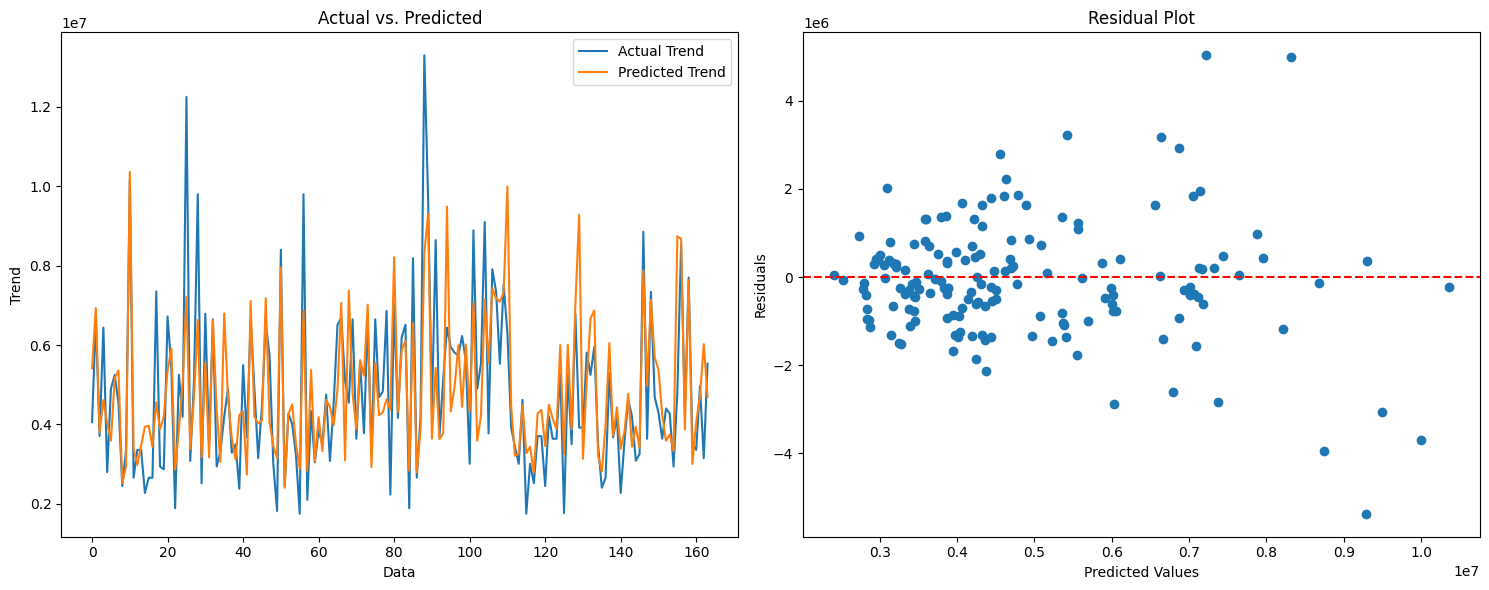

Results for Gradient Boost Regressor : 
Mean Square Erroe : 1598444106475.0005
R2 Score : 0.6288205070582598


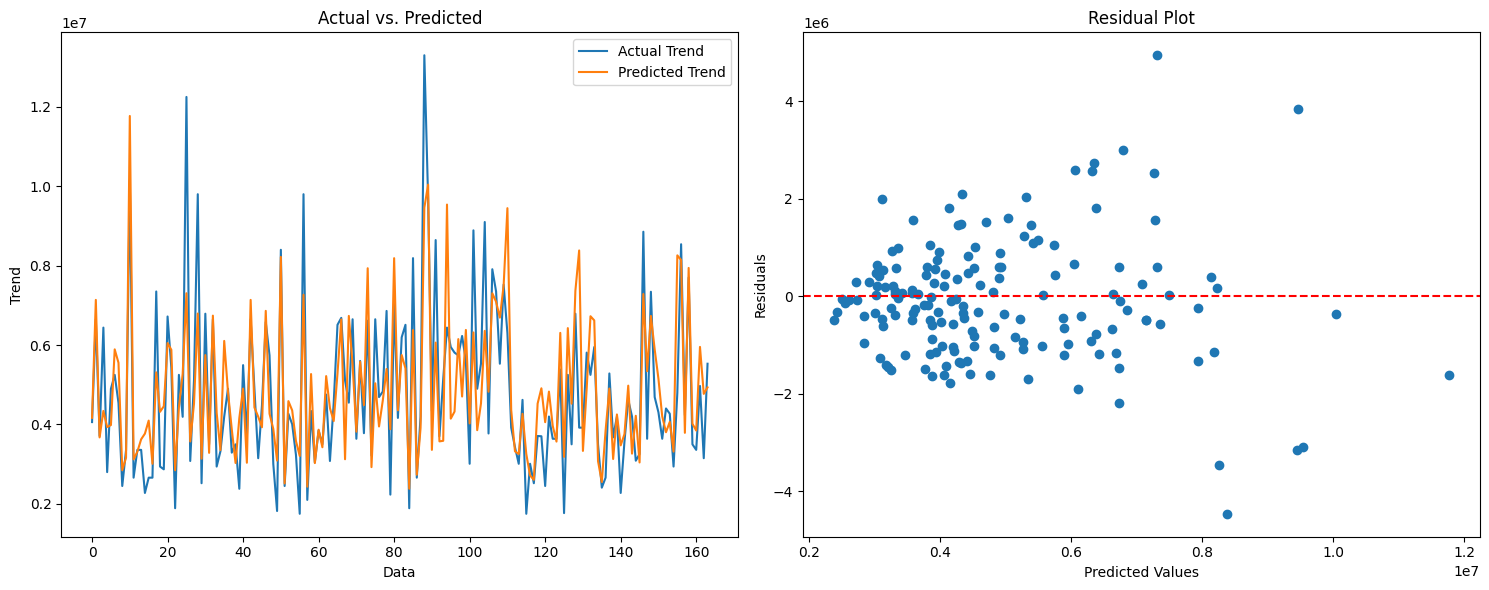

Results for XGBoost : 
Mean Square Erroe : 2085041665999.2249
R2 Score : 0.5158262252807617


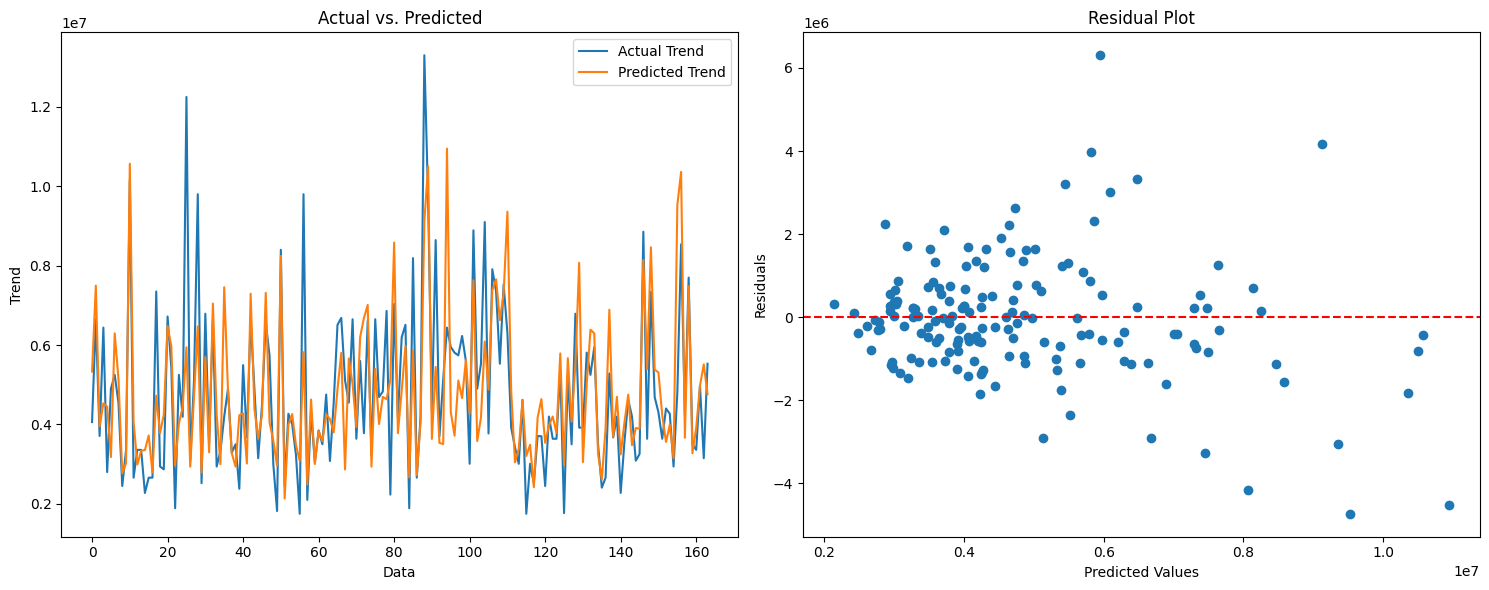

Results for XGRF Regressor : 
Mean Square Erroe : 2109811996415.8865
R2 Score : 0.510074257850647


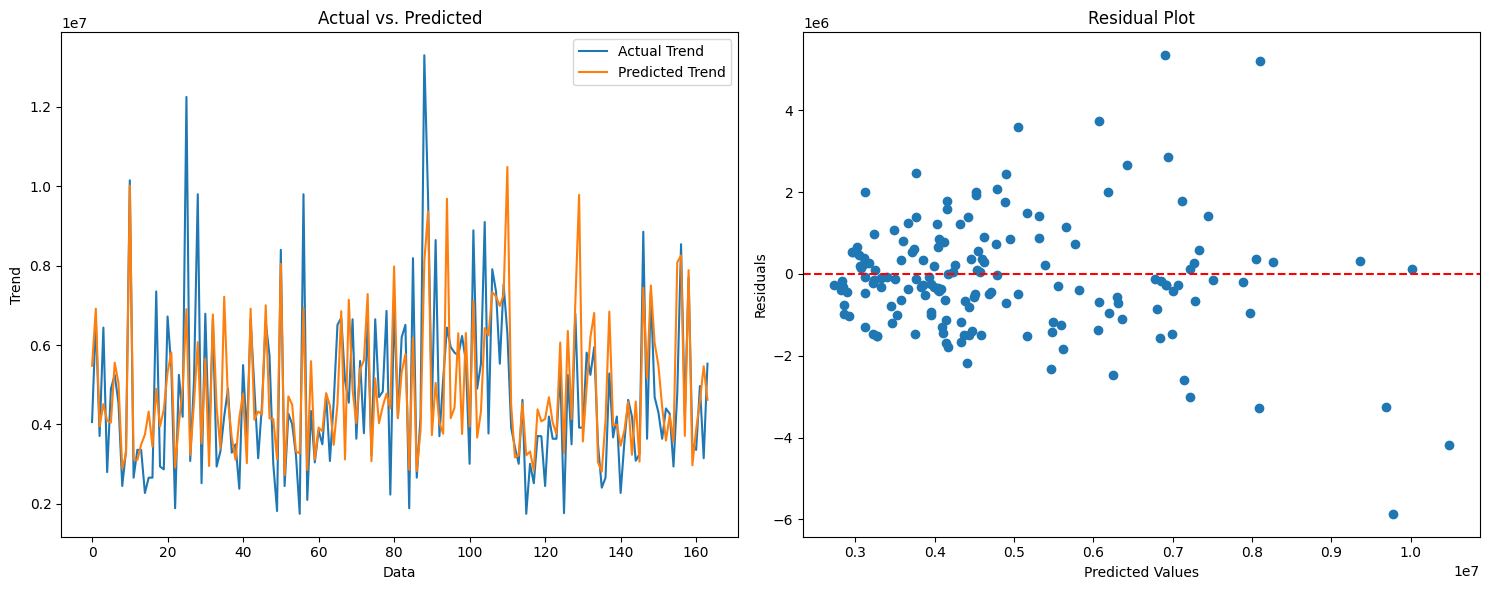

Results for Support Vector regressor : 
Mean Square Erroe : 4462165325262.905
R2 Score : -0.03617277335133684


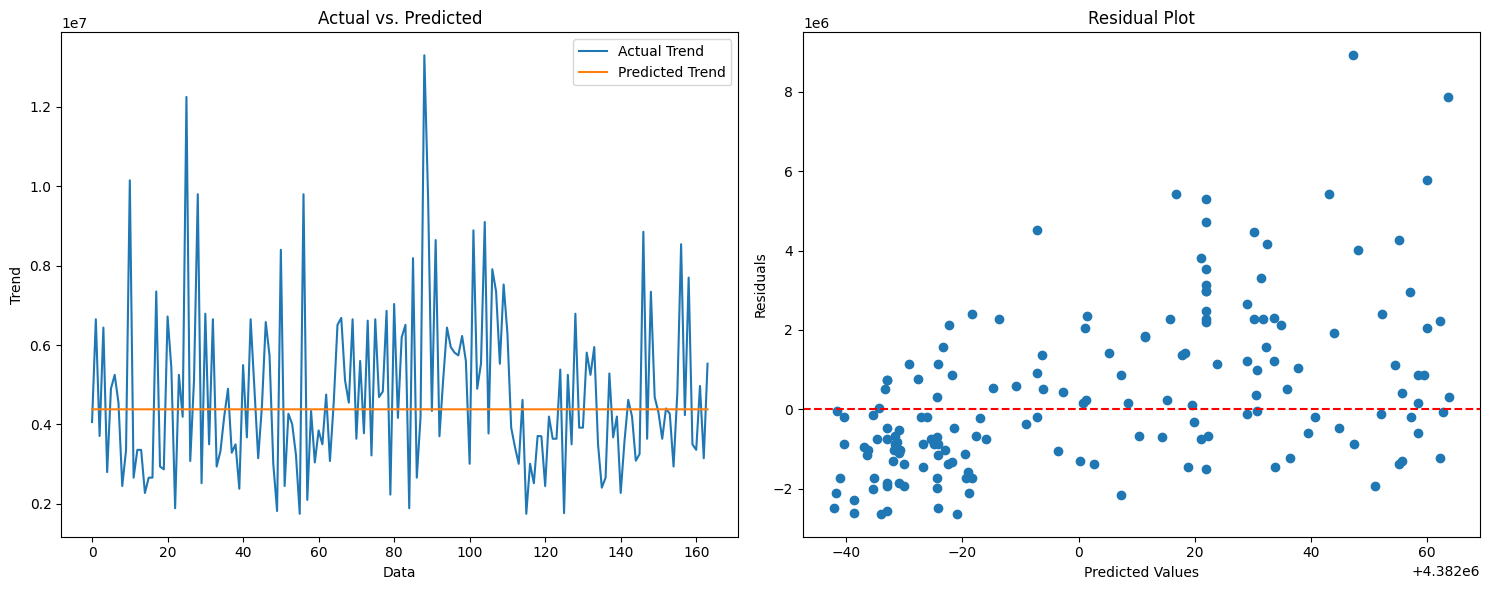

Results for Lasso Reg : 
Mean Square Erroe : 1523021266688.3394
R2 Score : 0.6463346705594011


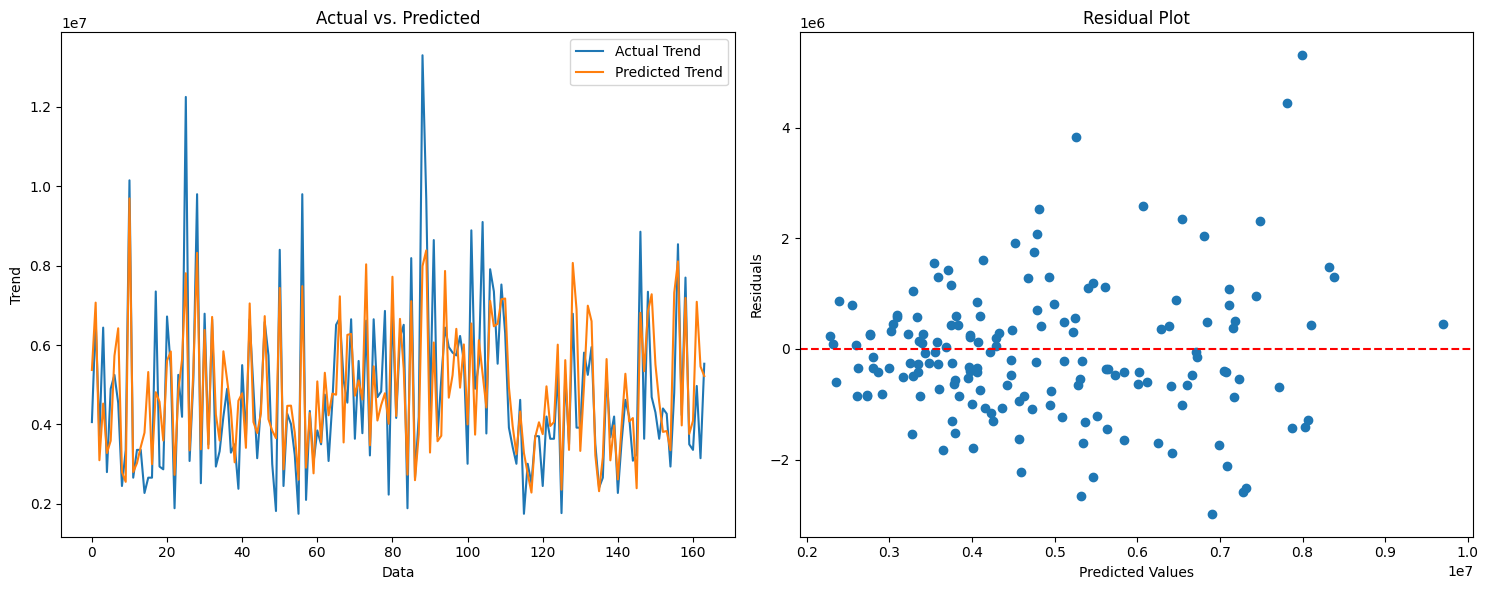

Results for Ridge Reg : 
Mean Square Erroe : 1525354840593.371
R2 Score : 0.6457927843743896


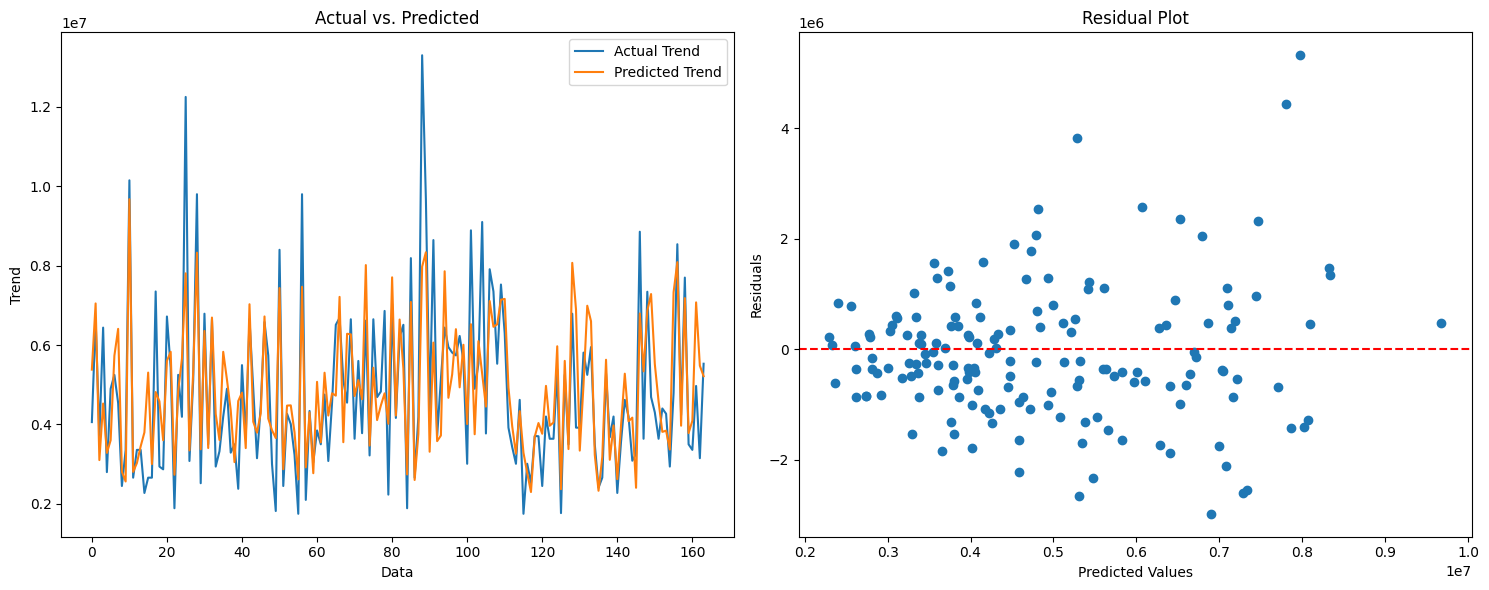

Results for LGBM Reg : 
Mean Square Erroe : 2355285952131.2944
R2 Score : 0.45307199550892097


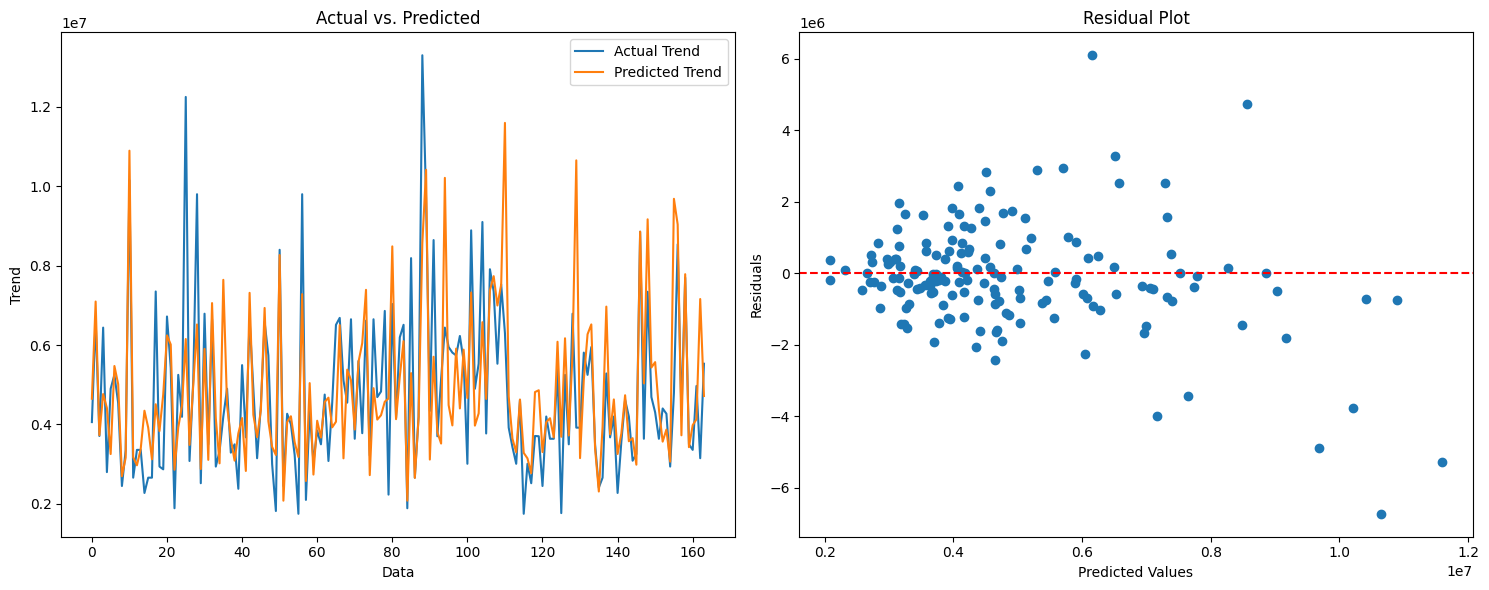

Results for Cat Boost : 
Mean Square Erroe : 1532351539182.4873
R2 Score : 0.6441680600414872


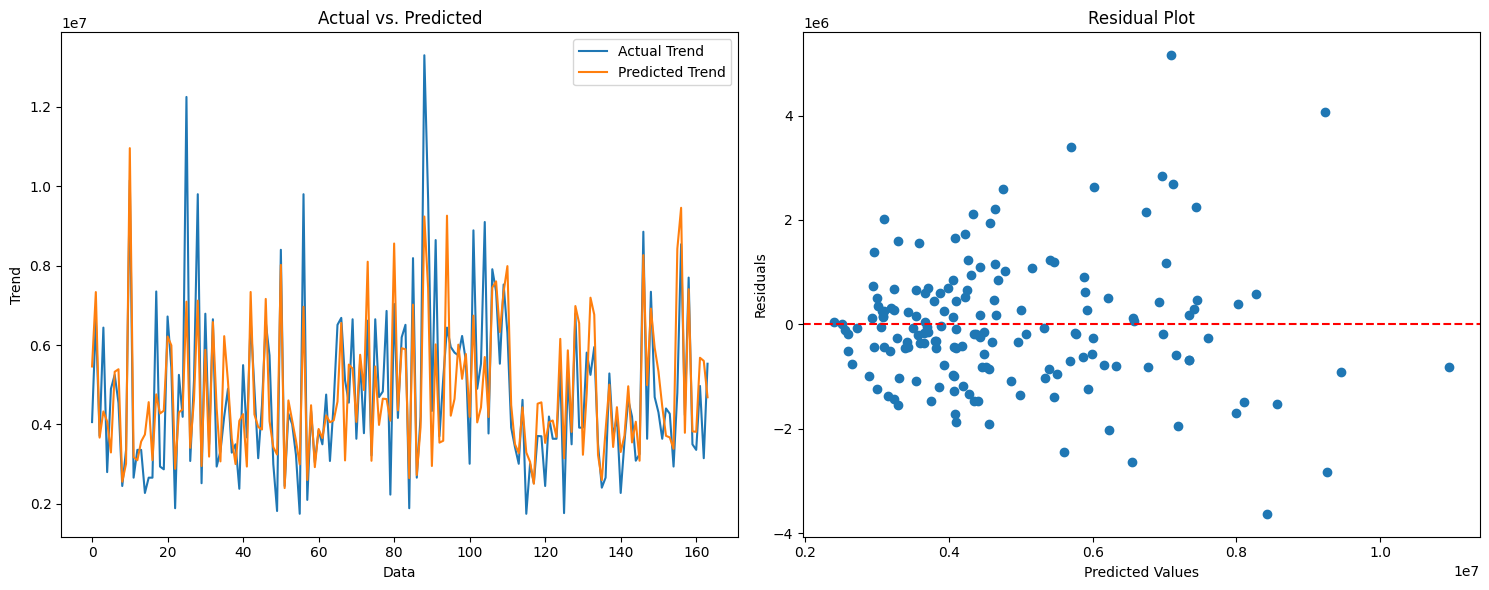

In [568]:
acc= {} 
for name, y_pred in pred.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc[name] = r2
    print(f"Results for {name} : ")
    print (f"Mean Square Erroe : {mse}")
    print(f"R2 Score : {r2}")
    plt.figure(figsize=(15, 6))


    plt.subplot(1, 2, 1)
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data')
    plt.ylabel('Trend')
    plt.legend()
    plt.title('Actual vs. Predicted')

    
    residuals = y_test - y_pred

    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')

    plt.tight_layout()
    plt.show()


In [569]:
for model_name, y_pred in pred.items():
    print(f"\nTahmin Sonuçları - {model_name}\n")
    df_compare = pd.DataFrame({
        "Gerçek Fiyat": y_test.values[:10],
        "Tahmin Edilen Fiyat": y_pred[:10],
        "Hata (Fark)": y_test.values[:10] - y_pred[:10]
    })
    print(df_compare.to_string(index=False))



Tahmin Sonuçları - Random Forest Regressor

 Gerçek Fiyat  Tahmin Edilen Fiyat  Hata (Fark)
      4060000            5415200.0   -1355200.0
      6650000            6933990.0    -283990.0
      3710000            3796870.0     -86870.0
      6440000            4612790.0    1827210.0
      2800000            4042360.0   -1242360.0
      4900000            3592890.0    1307110.0
      5250000            5167750.0      82250.0
      4543000            5359690.0    -816690.0
      2450000            2525040.0     -75040.0
      3353000            2945715.5     407284.5

Tahmin Sonuçları - Gradient Boost Regressor

 Gerçek Fiyat  Tahmin Edilen Fiyat   Hata (Fark)
      4060000         4.167085e+06 -1.070847e+05
      6650000         7.138029e+06 -4.880291e+05
      3710000         3.673876e+06  3.612369e+04
      6440000         4.341788e+06  2.098212e+06
      2800000         3.935278e+06 -1.135278e+06
      4900000         3.985668e+06  9.143320e+05
      5250000         5.891429e+06 -6.

In [570]:
model.fit(X_train,y_train)

Learning rate set to 0.035153
0:	learn: 1743336.7701314	total: 4.06ms	remaining: 4.06s
1:	learn: 1714060.0030864	total: 6.2ms	remaining: 3.09s
2:	learn: 1690709.4583202	total: 9.39ms	remaining: 3.12s
3:	learn: 1663659.7134220	total: 12.1ms	remaining: 3.01s
4:	learn: 1637187.2177462	total: 15.7ms	remaining: 3.12s
5:	learn: 1609904.4800750	total: 18.2ms	remaining: 3.02s
6:	learn: 1584473.7853580	total: 21.3ms	remaining: 3.02s
7:	learn: 1561474.3436137	total: 24.8ms	remaining: 3.08s
8:	learn: 1538194.2956306	total: 28.3ms	remaining: 3.12s
9:	learn: 1518629.5975152	total: 31ms	remaining: 3.07s
10:	learn: 1497158.3750672	total: 34.4ms	remaining: 3.09s
11:	learn: 1475780.8977487	total: 37.5ms	remaining: 3.09s
12:	learn: 1459072.9962560	total: 38.9ms	remaining: 2.95s
13:	learn: 1440179.2237151	total: 41.8ms	remaining: 2.94s
14:	learn: 1423259.9139846	total: 45.1ms	remaining: 2.96s
15:	learn: 1405035.2467784	total: 48.5ms	remaining: 2.98s
16:	learn: 1389390.6917344	total: 52.2ms	remaining: 3.0

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>Çıkarım:</font></h3>
    
* Lasso Reg, Ridge Reg ve Cat Boost modelleri, diğer modellere kıyasla **göreceli olarak daha yüksek doğruluk** oranlarına sahiptir.
* Support Vector Regressor ise **negatif doğruluk** değerine sahiptir, bu da **zayıf bir performans** sergilediğini göstermektedir.
* Random Forest Regressor, XGBoost ve LGBM Reg modelleri ise **orta düzeyde doğruluk** sunmuştur.

In [571]:
data = pd.DataFrame.from_dict(acc, orient='index', columns=['Accuracy'])
data

Accuracy
Random Forest Regressor   0.566101
Gradient Boost Regressor  0.628821
XGBoost                   0.515826
XGRF Regressor            0.510074
Support Vector regressor -0.036173
Lasso Reg                 0.646335
Ridge Reg                 0.645793
LGBM Reg                  0.453072
Cat Boost                 0.644168

In [572]:
Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>=50].columns.values,1,replace=False)
def Evaluate(n, pred1,pred2):

    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()


    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)

   
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 506121.7441107   202484.43152695  139450.06282876  133398.61250077
  188615.21004221  372751.65461894  246190.02625188  -30308.15961459
 -198804.06684934  440789.36063008  305757.52300951  277626.75631605
  126118.03877652  197000.31866324  343474.17781343  151166.5283796
  244580.92117385  -37220.34176416  -46015.73513198   97043.55812939
   53354.9316935    45570.74399582   53549.13213608]
The Intercept of the Regresion Model was found to be  4795729.220183486


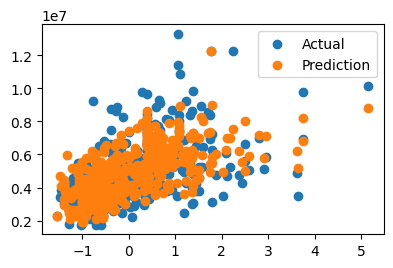



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.6891707500929043
Residual Sum of Squares (RSS) on Training set  ---> 471422706140768.4
Mean Squared Error (MSE) on Training set       ---> 1081244738854.9733
Root Mean Squared Error (RMSE) on Training set ---> 1039829.1873451973

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.6683662033948041
Residual Sum of Squares (RSS) on Training set  ---> 127583970343816.23
Mean Squared Error (MSE) on Training set       ---> 1170495140768.9563
Root Mean Squared Error (RMSE) on Training set ---> 1081894.2373305056

--------------------Residual Plots--------------------


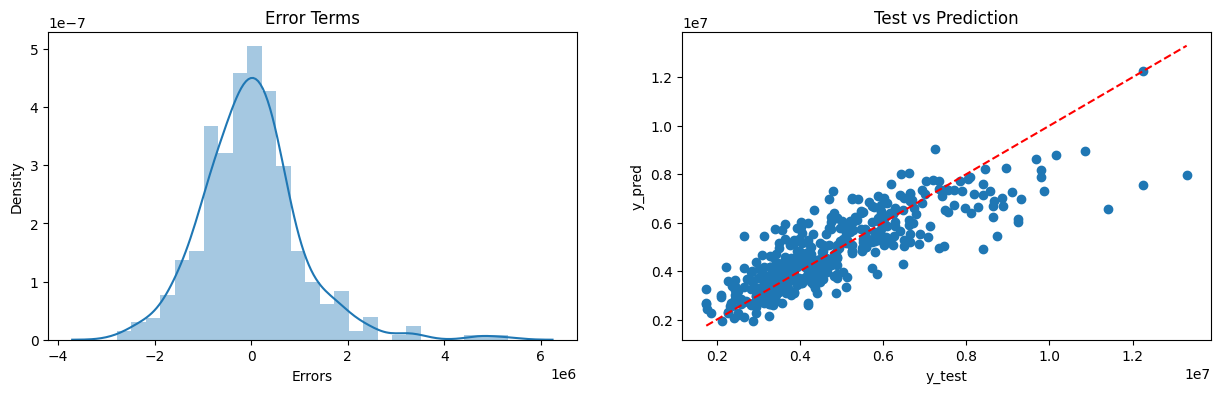

Gerçek Fiyat: 4,403,000  |  Tahmin Edilen Fiyat: 3,995,474
Gerçek Fiyat: 7,350,000  |  Tahmin Edilen Fiyat: 6,691,306
Gerçek Fiyat: 5,250,000  |  Tahmin Edilen Fiyat: 5,827,822
Gerçek Fiyat: 4,550,000  |  Tahmin Edilen Fiyat: 5,218,830
Gerçek Fiyat: 4,382,000  |  Tahmin Edilen Fiyat: 4,663,062
Gerçek Fiyat: 4,690,000  |  Tahmin Edilen Fiyat: 4,079,497
Gerçek Fiyat: 8,540,000  |  Tahmin Edilen Fiyat: 7,952,979
Gerçek Fiyat: 5,250,000  |  Tahmin Edilen Fiyat: 5,464,698
Gerçek Fiyat: 2,730,000  |  Tahmin Edilen Fiyat: 3,416,576
Gerçek Fiyat: 5,950,000  |  Tahmin Edilen Fiyat: 5,919,395
Gerçek Fiyat: 3,675,000  |  Tahmin Edilen Fiyat: 2,917,459
Gerçek Fiyat: 6,650,000  |  Tahmin Edilen Fiyat: 6,534,584
Gerçek Fiyat: 2,380,000  |  Tahmin Edilen Fiyat: 4,416,934
Gerçek Fiyat: 5,943,000  |  Tahmin Edilen Fiyat: 7,572,876
Gerçek Fiyat: 5,600,000  |  Tahmin Edilen Fiyat: 5,626,645
Gerçek Fiyat: 4,970,000  |  Tahmin Edilen Fiyat: 7,041,393
Gerçek Fiyat: 12,215,000  |  Tahmin Edilen Fiyat: 6,954,

In [573]:


MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)
for actual, predicted in zip(Test_Y, pred2):
    print(f"Gerçek Fiyat: {actual:,.0f}  |  Tahmin Edilen Fiyat: {predicted:,.0f}")


<<<----------------------------------- Evaluating Ridge Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 505218.85251171  202662.78963381  139630.11084605  133038.57415345
  188280.46351312  372404.46279472  245936.75046543  -30000.69791512
 -198519.37129763  440057.04385001  304987.85258305  276993.79576509
  124977.48692766  196112.319565    342617.92647432  151028.11014536
  244248.20712836  -36983.60851348  -55318.48523412   87442.43241697
   46750.38264081   43571.20923177   52109.44677855]
The Intercept of the Regresion Model was found to be  4795729.220183486


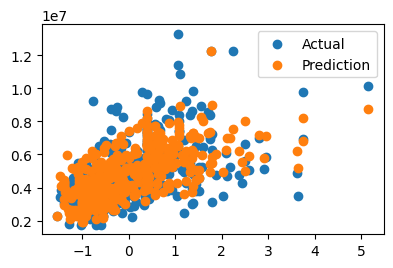



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.6891687639709296
Residual Sum of Squares (RSS) on Training set  ---> 471425718415180.5
Mean Squared Error (MSE) on Training set       ---> 1081251647741.2396
Root Mean Squared Error (RMSE) on Training set ---> 1039832.5094654616

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.6684848963340738
Residual Sum of Squares (RSS) on Training set  ---> 127538307577841.2
Mean Squared Error (MSE) on Training set       ---> 1170076216310.4697
Root Mean Squared Error (RMSE) on Training set ---> 1081700.6130674372

--------------------Residual Plots--------------------


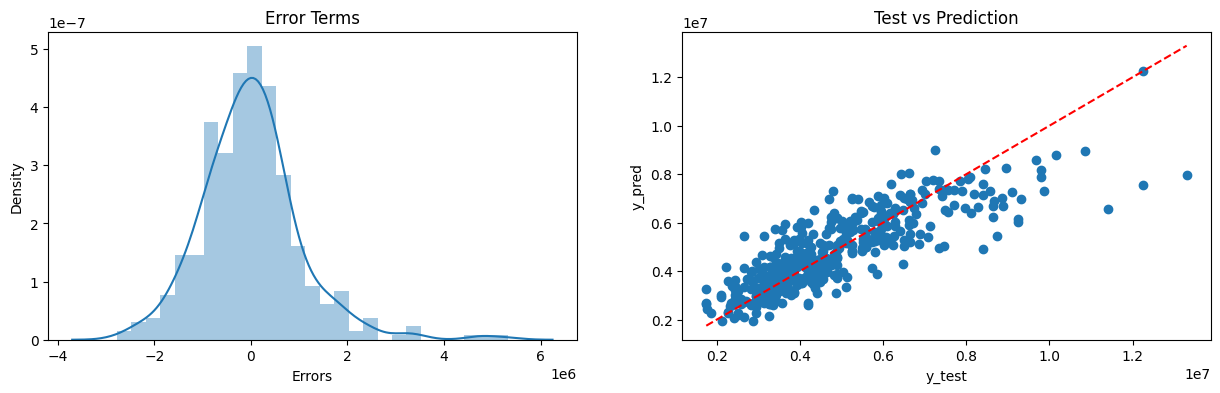

In [574]:
RLR = Ridge().fit(Train_X_std,Train_Y)
pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',RLR.coef_)
print('The Intercept of the Regresion Model was found to be ',RLR.intercept_)

Evaluate(1, pred1, pred2)

<<<----------------------------------- Evaluating Lasso Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 506121.9998517   202484.50217771  139449.85127867  133398.18112994
  188614.52619405  372751.8218486   246189.63775532  -30305.37866403
 -198801.89196749  440789.76703931  305756.80998666  277625.62689637
  126117.68529284  196999.54911984  343473.26163551  151166.04456532
  244580.3560718   -37218.96840024  -46077.60609415   96972.17406997
   53302.02801717   45552.15537693   53538.50775778]
The Intercept of the Regresion Model was found to be  4795729.220183486


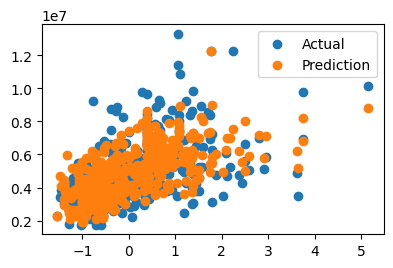



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.689170750061572
Residual Sum of Squares (RSS) on Training set  ---> 471422706188288.8
Mean Squared Error (MSE) on Training set       ---> 1081244738963.9653
Root Mean Squared Error (RMSE) on Training set ---> 1039829.1873976059

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.6683664121239545
Residual Sum of Squares (RSS) on Training set  ---> 127583890042912.06
Mean Squared Error (MSE) on Training set       ---> 1170494404063.4133
Root Mean Squared Error (RMSE) on Training set ---> 1081893.8968602298

--------------------Residual Plots--------------------


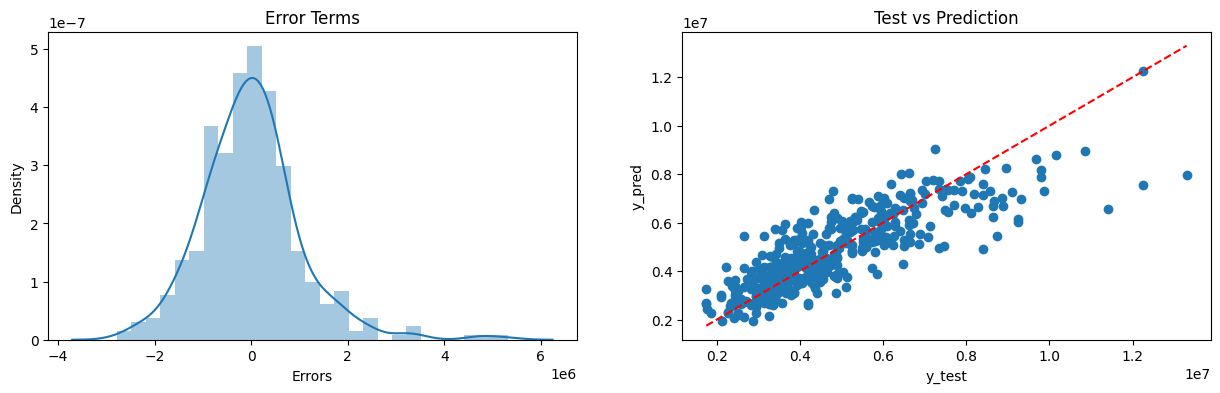

In [575]:
LLR = Lasso().fit(Train_X_std,Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',LLR.coef_)
print('The Intercept of the Regresion Model was found to be ',LLR.intercept_)

Evaluate(2, pred1, pred2)

<<<----------------------------------- Evaluating Elastic-Net Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 383996.55348652  187269.6666382   141950.09245161   97411.76464916
  132348.50903901  299033.1991407   197302.9949206    -8404.688698
 -161228.35936409  330666.00941712  200415.42835312  187323.78477522
   26539.06885139  112268.38266574  251191.84505058  111773.64846024
  192582.10227838   -7705.82382757 -141366.13747201   61601.25725173
   69419.8575783    69059.2048228    29015.39646673]
The Intercept of the Regresion Model was found to be  4795729.220183486


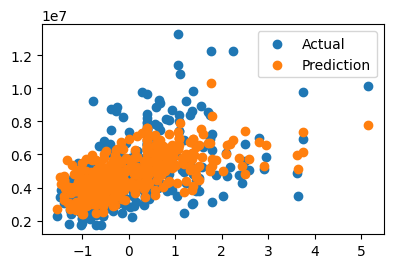



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.6590756007870924
Residual Sum of Squares (RSS) on Training set  ---> 517066855562667.56
Mean Squared Error (MSE) on Training set       ---> 1185933154960.2466
Root Mean Squared Error (RMSE) on Training set ---> 1089005.5807755287

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.6578955254559644
Residual Sum of Squares (RSS) on Training set  ---> 131612180608582.89
Mean Squared Error (MSE) on Training set       ---> 1207451198243.8796
Root Mean Squared Error (RMSE) on Training set ---> 1098840.8429995126

--------------------Residual Plots--------------------


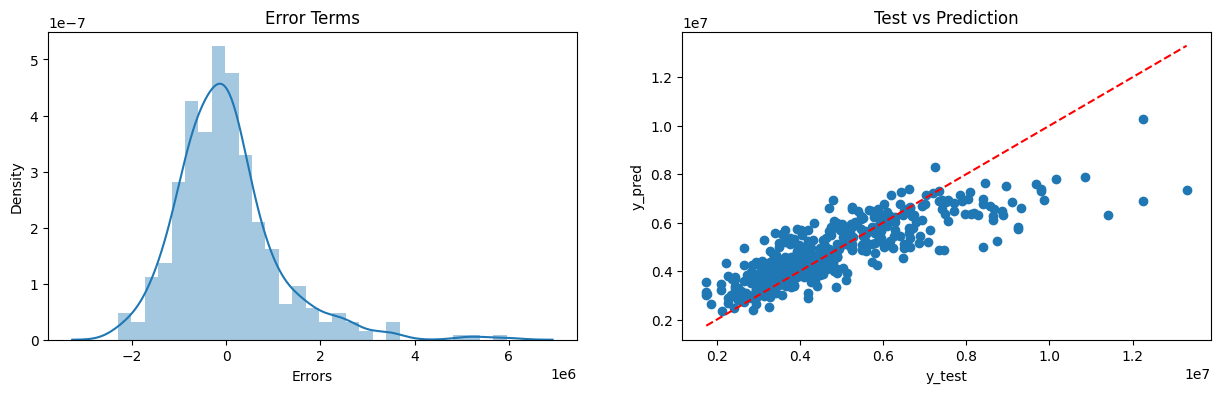

Gerçek Fiyat: 4,403,000  |  Tahmin Edilen Fiyat: 4,194,746
Gerçek Fiyat: 7,350,000  |  Tahmin Edilen Fiyat: 6,330,970
Gerçek Fiyat: 5,250,000  |  Tahmin Edilen Fiyat: 5,718,166
Gerçek Fiyat: 4,550,000  |  Tahmin Edilen Fiyat: 5,210,749
Gerçek Fiyat: 4,382,000  |  Tahmin Edilen Fiyat: 4,815,251
Gerçek Fiyat: 4,690,000  |  Tahmin Edilen Fiyat: 4,398,401
Gerçek Fiyat: 8,540,000  |  Tahmin Edilen Fiyat: 7,403,205
Gerçek Fiyat: 5,250,000  |  Tahmin Edilen Fiyat: 5,317,131
Gerçek Fiyat: 2,730,000  |  Tahmin Edilen Fiyat: 3,597,888
Gerçek Fiyat: 5,950,000  |  Tahmin Edilen Fiyat: 5,869,953
Gerçek Fiyat: 3,675,000  |  Tahmin Edilen Fiyat: 3,173,320
Gerçek Fiyat: 6,650,000  |  Tahmin Edilen Fiyat: 6,372,090
Gerçek Fiyat: 2,380,000  |  Tahmin Edilen Fiyat: 4,554,825
Gerçek Fiyat: 5,943,000  |  Tahmin Edilen Fiyat: 7,076,713
Gerçek Fiyat: 5,600,000  |  Tahmin Edilen Fiyat: 5,503,775
Gerçek Fiyat: 4,970,000  |  Tahmin Edilen Fiyat: 6,342,642
Gerçek Fiyat: 12,215,000  |  Tahmin Edilen Fiyat: 6,669,

In [576]:
ENR = ElasticNet().fit(Train_X_std,Train_Y)
pred1 = ENR.predict(Train_X_std)
pred2 = ENR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',ENR.coef_)
print('The Intercept of the Regresion Model was found to be ',ENR.intercept_)

Evaluate(3, pred1, pred2)

for actual, predicted in zip(Test_Y, pred2):
    print(f"Gerçek Fiyat: {actual:,.0f}  |  Tahmin Edilen Fiyat: {predicted:,.0f}")


<<<----------------------------------- Evaluating Polynomial Regression Model ----------------------------------->>>

The Coefficients of the Regression Model are:
 [ 0.00000000e+00  3.94479192e+05  6.07022936e+04  2.96375802e+04
  1.27003170e+05  2.07571324e+03  9.39549486e+04  9.53501480e+04
  2.42186821e+04 -5.10571803e+04  1.60953771e+05  6.86313831e+03
  5.67146833e+02  9.69053080e+04  1.78201154e+04  3.46709322e+04
  2.85885975e+04  6.64420393e+04  3.85851846e+01 -4.04722437e+04
  7.26731740e+04  3.02826776e+04 -9.16172050e+01  3.71133225e+02
 -7.64435713e+04  1.50796972e+05 -2.40946789e+05  1.15896777e+05
 -4.93144808e+04  7.45924407e+04  6.57452070e+04 -1.15322838e+04
 -5.31196119e+04  2.07134246e+05  5.94845770e+04 -1.79069183e+04
  5.91745940e+04 -6.15634647e+03 -3.48622409e+05  3.78151911e+04
  3.72198337e+04 -6.49327531e+04  9.43740068e+03  9.39060956e+03
 -8.07155168e+04  1.60936358e+04 -2.38449770e+04 -1.27709333e+05
 -4.00868681e+03  6.96079795e+04  1.90296838e+05 -6.577

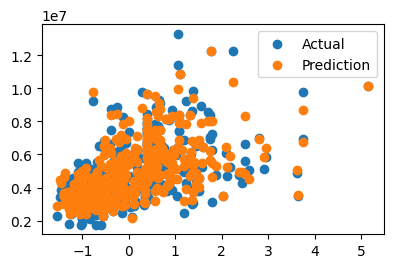



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.8475419613132182
Residual Sum of Squares (RSS) on Training set  ---> 231227212986289.47
Mean Squared Error (MSE) on Training set       ---> 530337644463.9668
Root Mean Squared Error (RMSE) on Training set ---> 728242.847176659

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.5777566068047149
Residual Sum of Squares (RSS) on Training set  ---> 162442697658564.2
Mean Squared Error (MSE) on Training set       ---> 1490299978518.9375
Root Mean Squared Error (RMSE) on Training set ---> 1220778.4313784945

--------------------Residual Plots--------------------


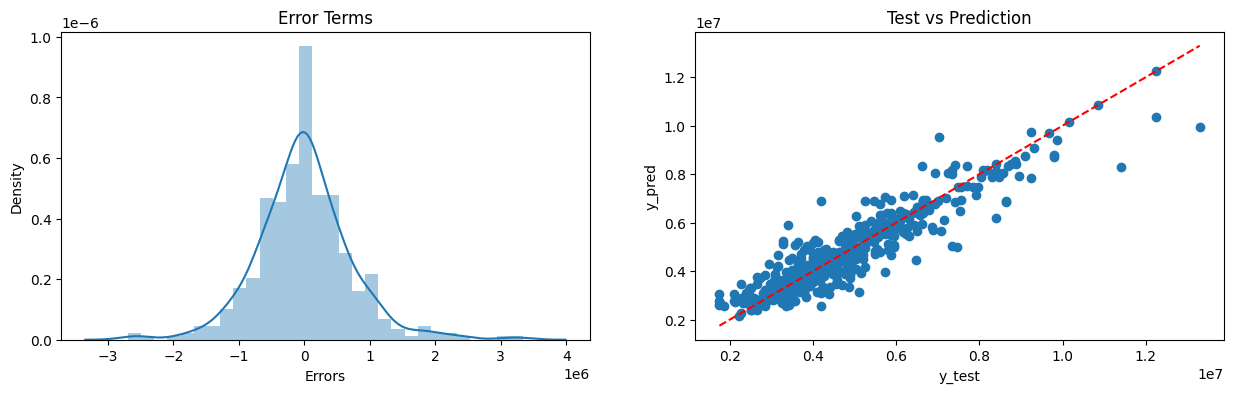

In [577]:
poly_reg = PolynomialFeatures(degree=2)

X_poly_train = poly_reg.fit_transform(Train_X_std)
X_poly_test = poly_reg.transform(Test_X_std)

PR = Ridge(alpha=1.0)  

PR.fit(X_poly_train, Train_Y)

pred_train = PR.predict(X_poly_train)
pred_test = PR.predict(X_poly_test)

print('{}{}\033[1m Evaluating Polynomial Regression Model \033[0m{}{}\n'.format('<'*3, '-'*35, '-'*35, '>'*3))
print('The Coefficients of the Regression Model are:\n', PR.coef_)
print('The Intercept of the Regression Model is:\n', PR.intercept_)


# Evaluate fonksiyonu varsa onu da çağır
Evaluate(4, pred_train, pred_test)


In [578]:
# Regression Models Results Evaluation
EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Multiple Linear Regression (MLR)','Ridge Linear Regression (RLR)','Lasso Linear Regression (LLR)','Elastic-Net Regression (ENR)','Polynomial Regression (PNR)']
EMC

Train-R2   Test-R2     Train-RSS  \
Multiple Linear Regression (MLR)  0.689171  0.668366  4.714227e+14   
Ridge Linear Regression (RLR)     0.689169  0.668485  4.714257e+14   
Lasso Linear Regression (LLR)     0.689171  0.668366  4.714227e+14   
Elastic-Net Regression (ENR)      0.659076  0.657896  5.170669e+14   
Polynomial Regression (PNR)       0.847542  0.577757  2.312272e+14   

                                      Test-RSS     Train-MSE      Test-MSE  \
Multiple Linear Regression (MLR)  1.275840e+14  1.081245e+12  1.170495e+12   
Ridge Linear Regression (RLR)     1.275383e+14  1.081252e+12  1.170076e+12   
Lasso Linear Regression (LLR)     1.275839e+14  1.081245e+12  1.170494e+12   
Elastic-Net Regression (ENR)      1.316122e+14  1.185933e+12  1.207451e+12   
Polynomial Regression (PNR)       1.624427e+14  5.303376e+11  1.490300e+12   

                                    Train-RMSE     Test-RMSE  
Multiple Linear Regression (MLR)  1.039829e+06  1.081894e+06  
Ridge Linear Regression (RLR)     1.039833e+06  1.081701e+06  
Lasso Linear Regression (LLR)     1.039829e+06  1.081894e+06  
Elastic-Net Regression (ENR)      1.089006e+06  1.098841e+06  
Polynomial Regression (PNR)       7.282428e+05  1.220778e+06

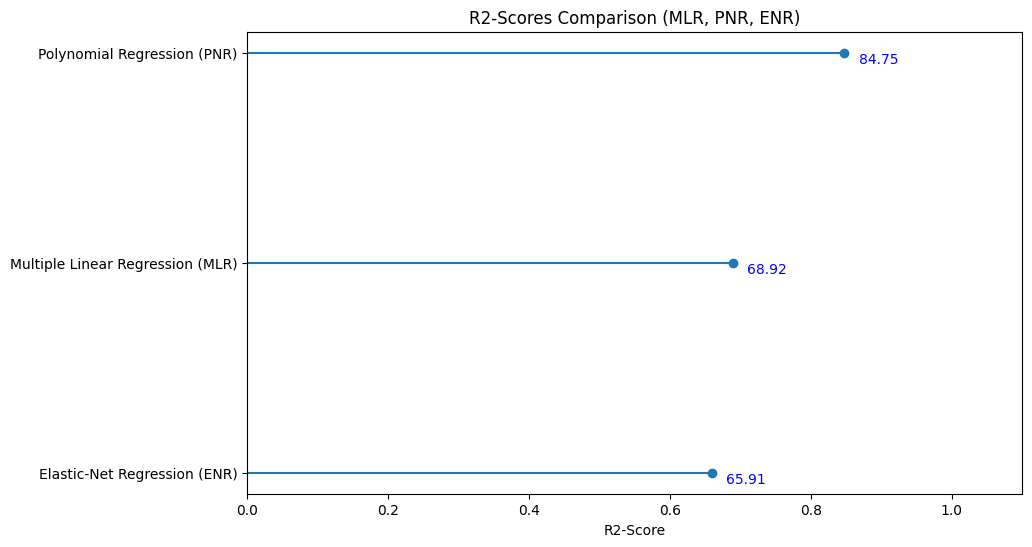

In [579]:
filtered_R2 = EMC.loc[['Multiple Linear Regression (MLR)', 
                       'Polynomial Regression (PNR)', 
                       'Elastic-Net Regression (ENR)'], 'Train-R2']

R2 = round(filtered_R2.sort_values(ascending=True), 4)

plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index, 'o')
plt.title('R2-Scores Comparison (MLR, PNR, ENR)')
plt.xlabel('R2-Score')

for i, v in enumerate(R2):
    plt.text(v + 0.02, i - 0.05, str(v * 100), color='blue')

plt.xlim([0, 1.1])
plt.show()


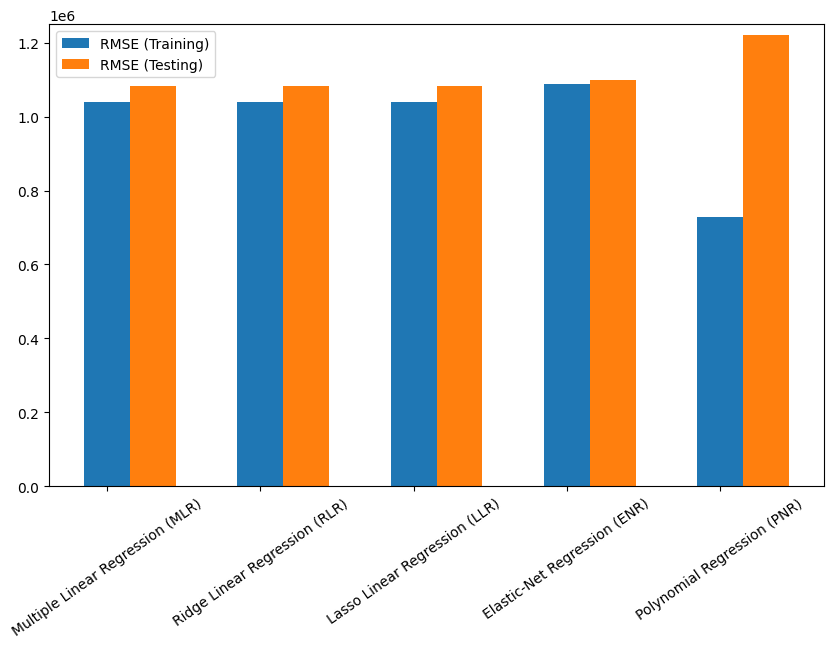

In [ ]:

cc = Model_Evaluation_Comparison_Matrix.columns.values
s=5

plt.bar(np.arange(5), Model_Evaluation_Comparison_Matrix[cc[6]].values, width=0.3, label='RMSE (STraining)')
plt.bar(np.arange(5)+0.3, Model_Evaluation_Comparison_Matrix[cc[7]].values, width=0.3, label='RMSE (Testing)')
plt.xticks(np.arange(5),EMC.index, rotation =35)
plt.legend()
plt.ylim([0,1.25e6])
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>Çıkarım:</font></h3>

* Random Forest Regressor, 0.572596 doğruluk oranı ile **orta düzeyde bir performans** sergilemiştir.
* Gradient Boost Regressor, 0.631541 doğruluk oranı ile **göreceli olarak daha iyi bir performans** göstermiştir.
* XGBoost, 0.615472 doğruluk ile **benzer bir performans** ortaya koymuştur.
* XGRF Regressor, 0.516562 doğruluk ile **modeller arasında en düşük performansı** göstermiştir.
* Support Vector Regressor, -0.036173 doğruluk değeriyle **negatif bir performans** sergileyerek bu regresyon problemi üzerinde **zayıf bir başarı** göstermiştir.
* Lasso Reg, 0.646335 doğruluk ile **iyi bir performans** sergilemiştir.
* Ridge Reg, 0.645793 doğrulukla **benzer bir başarı** elde ederek regresyon görevinde **etkili olduğunu** ortaya koymuştur.
* LGBM Reg, 0.627768 doğruluk oranı ile **başarılı bir performans** göstermiştir.
* Cat Boost ise 0.644168 doğruluk oranı ile **umut vadeden sonuçlar** sunmuştur.



<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>Çıkarım:</font></h3>

*Multiple Linear Regression (MLR)
MLR modeli, eğitim verisinde verinin yaklaşık %68.9’unu açıklayabilmektedir. Test verisinde de benzer bir başarı (yaklaşık %66.8) göstermiştir. Bu, modelin overfitting yapmadan genelleme yeteneğine sahip olduğunu gösterir.
Train ve Test MSE değerleri birbirine yakın (yaklaşık 1.08e+12), bu da dengeyi koruyan bir model olduğunu destekler.

*Ridge Linear Regression (RLR)
Ridge regresyon, klasik MLR’ye çok benzer performans göstermektedir. R² skorları neredeyse eşit ve Train/Test MSE farkı çok düşüktür. Bu model, düzenleme (regularization) etkisi sayesinde çoklu doğrusal bağlantılara karşı daha dayanıklı olmasına rağmen bu veri setinde klasik MLR’den ciddi bir fark yaratmamıştır.

*Lasso Linear Regression (LLR)
Lasso Regresyon da MLR ile neredeyse aynı sonucu vermiştir. Ancak Lasso, gereksiz değişkenleri sıfırlama özelliğine sahiptir (özellik seçimi). Bu sebeple benzer performansla birlikte modelin daha sadeleşmesini sağlamış olabilir. Metrikler neredeyse birebir aynı.

*Elastic-Net Regression (ENR)
Elastic-Net modeli, L1 (Lasso) ve L2 (Ridge) düzenlemelerinin birleşimini kullanır. Bu modelin eğitim ve test R² skorları, önceki modellere göre bir miktar düşüktür (~%65.7). Ancak eğitim ve test skorları birbirine çok yakın olduğundan, dengeli ve kararlı bir model olduğu söylenebilir.
Train RMSE: 1.089.006 — Test RMSE: 1.098.841 → Hafif hata artışı vardır ama aşırıya kaçmaz.

